# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EasyVisa.csv')

In [ ]:
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
df.shape

(25480, 12)

There are 25480 rows and 12 columns in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The dataset contains 9 categorical columns and 3 numerical columns.

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*   The case_id column has unique rows.
*   The most frequent continent is Asia. About 66% of the candidates are from Asia.
*   The education_of_employee column has 4 unique values. $0% of the candidates have a Bachelor's degree.
*   58% of the candidates have job experience.
*   About 88% of the candidates does not require job training.
*   The average number of employees in the employers company is about 5667. 75% of the companies have 3504 employees. We can see the huge difference between 75% and max. And min no_of_employees as -26.
*   50% of the companies have been established in the year 1997.
*   There are 5 unique values in the region_of_employment column. The most frequent is Northeast region.
*   The average prevailing_wage is 74456 dollars. The median prevailing_wage is 70308 dollars.
*   The unit_of_wage has 4 unique values. About 90% of the candidates have Year as their unit_of_wage.
*   About 89% of the candidates have a full time job.
*   66.7% of the candidates have been certified to give visa.

In [ ]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the dataset.

In [ ]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [ ]:
df.drop(['case_id'], axis = 1, inplace = True)

Since the case_id column has unique rows, we can drop them.

In [ ]:
print(df['continent'].value_counts())
print(df['education_of_employee'].value_counts())
print(df['has_job_experience'].value_counts())
print(df['requires_job_training'].value_counts())
print(df['region_of_employment'].value_counts())
print(df['unit_of_wage'].value_counts())
print(df['full_time_position'].value_counts())
print(df['case_status'].value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
df.loc[df['no_of_employees'] < 0].shape

(33, 11)

In [ ]:
df['case_status'].loc[df['no_of_employees'] < 0].value_counts()

Certified    17
Denied       16
Name: case_status, dtype: int64

We have 33 rows where the no_of_employees is a negative number.

In [ ]:
df = df.drop(df[df['no_of_employees'] < 0].index)

In [ ]:
df.loc[df['no_of_employees'] < 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


No_of_employees column cannot be less than 0. Since only 33 rows have negative numbers and that is only 0.001% of the data, we are dropping the rows.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###Univariate Analysis

In [ ]:
def countplots(data, feature,perc):
  ax = sns.countplot(data = df, x = feature)
  plt.xticks(rotation = 90)
  for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / len(data[feature])
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
  plt.show()

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

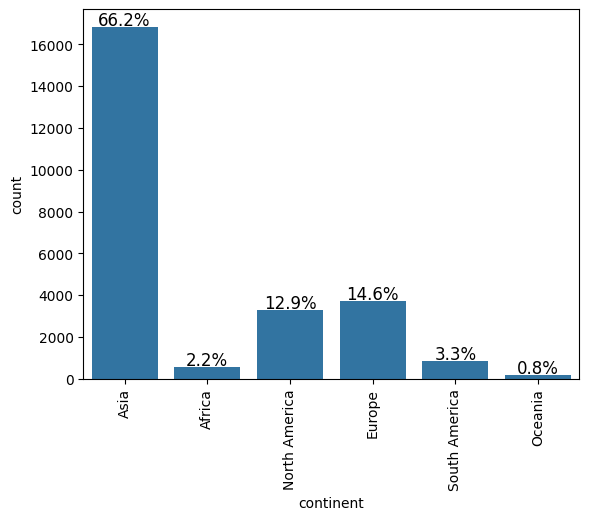

In [ ]:
countplots(df, 'continent', perc = True)

*   66% of the candidates are from Asia followed by 14.6% from Europe.
*   Oceania has the least number of candidates.

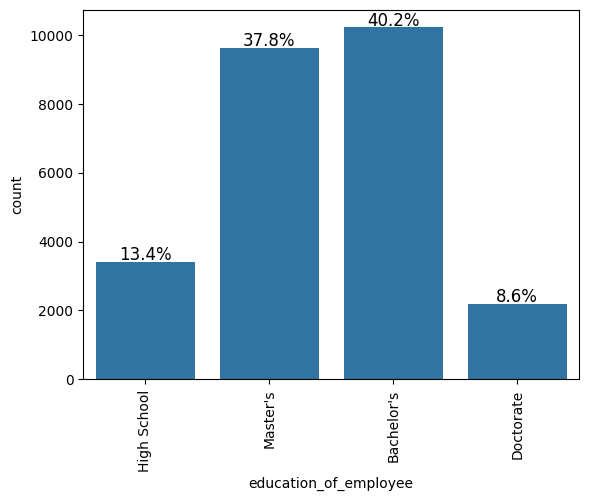

In [ ]:
countplots(df, 'education_of_employee', perc = True)

*   4About 40% of the candidates have a Bachelor's degree followed by 37.8% candidates having a Master's degreee.
*   8.6% candidates have Doctorate degree.

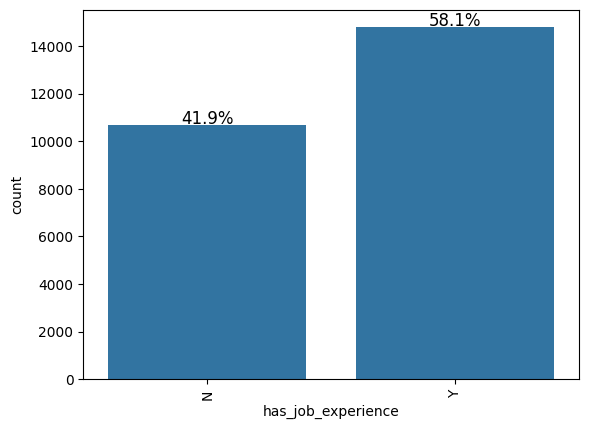

In [ ]:
countplots(df, 'has_job_experience', perc = True)

*   Abot 58% of the candidates have job experience.

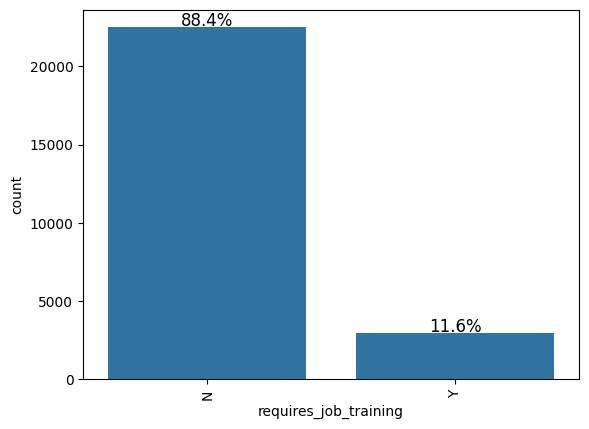

In [ ]:
countplots(df, 'requires_job_training', perc = True)

*   Only 11.6% of the candidates need job training.

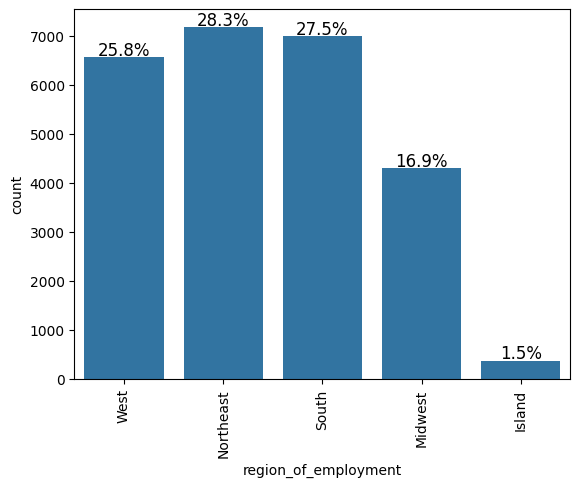

In [ ]:
countplots(df, 'region_of_employment', perc = True)

*   28.3% of the candidates are working from the Northeast region followed by 27.5% of the candidates working from South region.
*   Only 1.5% of the candidates are working from the Island region.

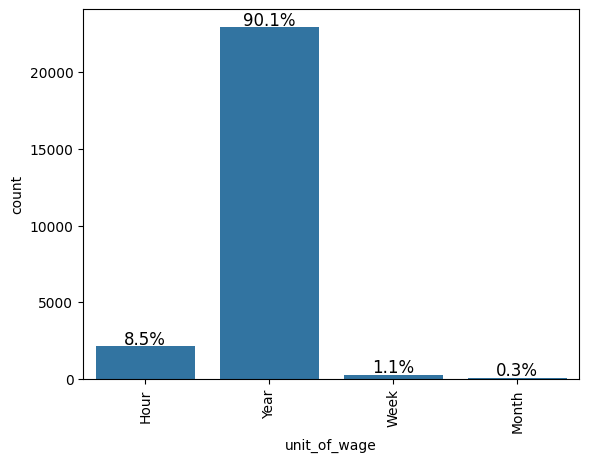

In [ ]:
countplots(df, 'unit_of_wage', perc = True)

*   90% of the candidates have Yearly wage followed b 8.5% candidates having Hourly wage.
*   Only 0.3% candidates have Monthly wage.

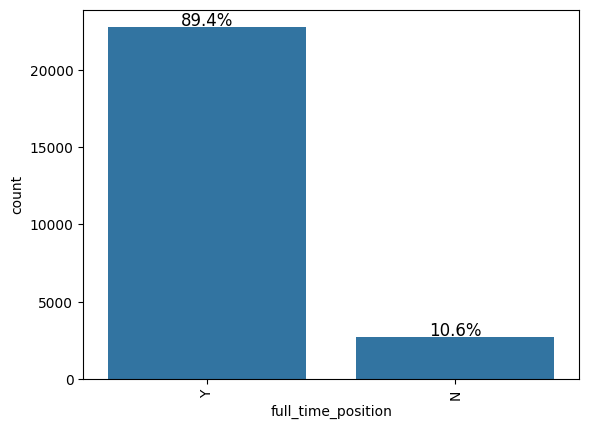

In [ ]:
countplots(df, 'full_time_position', perc = True)

*   89.4% of the candidates have a full-time job in a company.

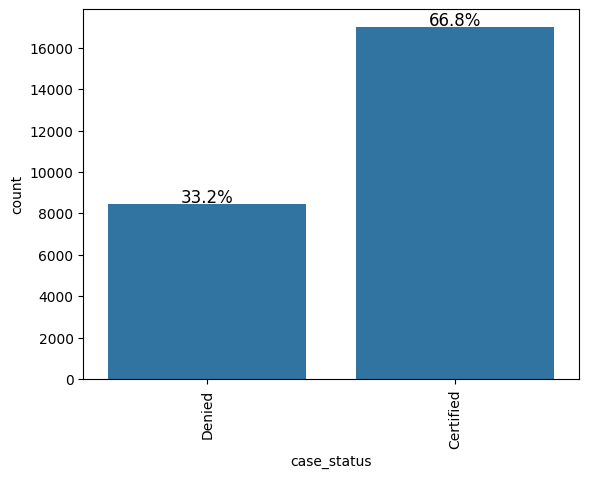

In [ ]:
countplots(df, 'case_status', perc = True)

*   Almost 67% of the candidates have been certified a visa.

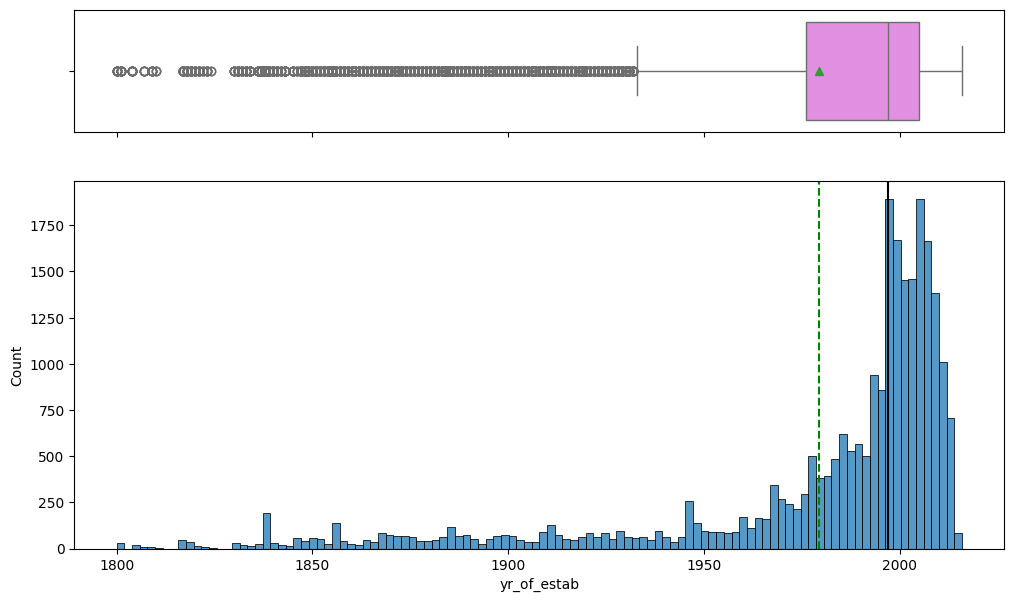

In [ ]:
histogram_boxplot(df, 'yr_of_estab')

*   The data is left skewed.
*   50% of the companies have been established after 1995.

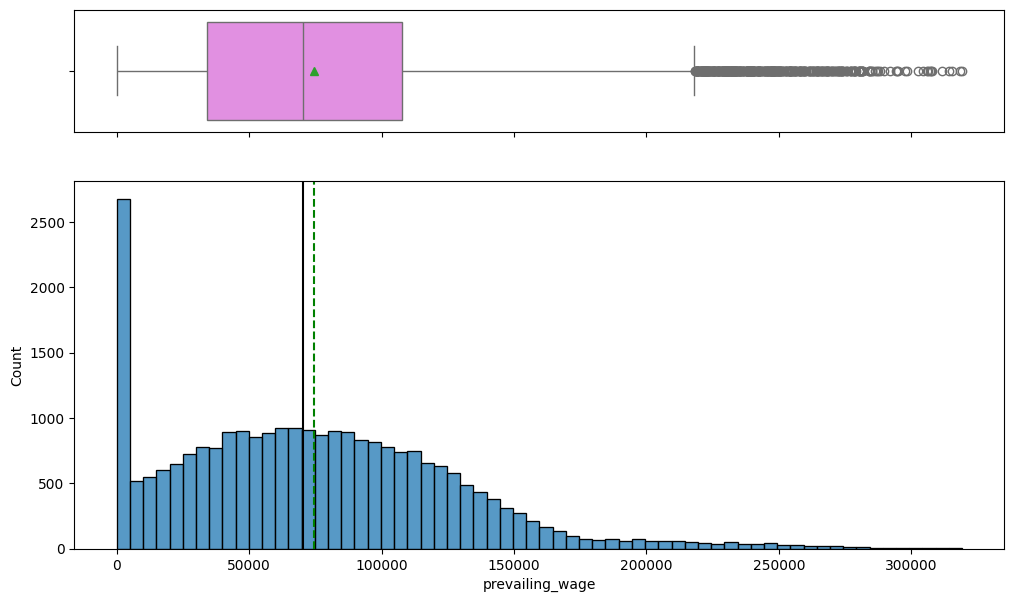

In [ ]:
histogram_boxplot(df, 'prevailing_wage')

*   The mean and the median of prevailing age column is somewhat close to each other.

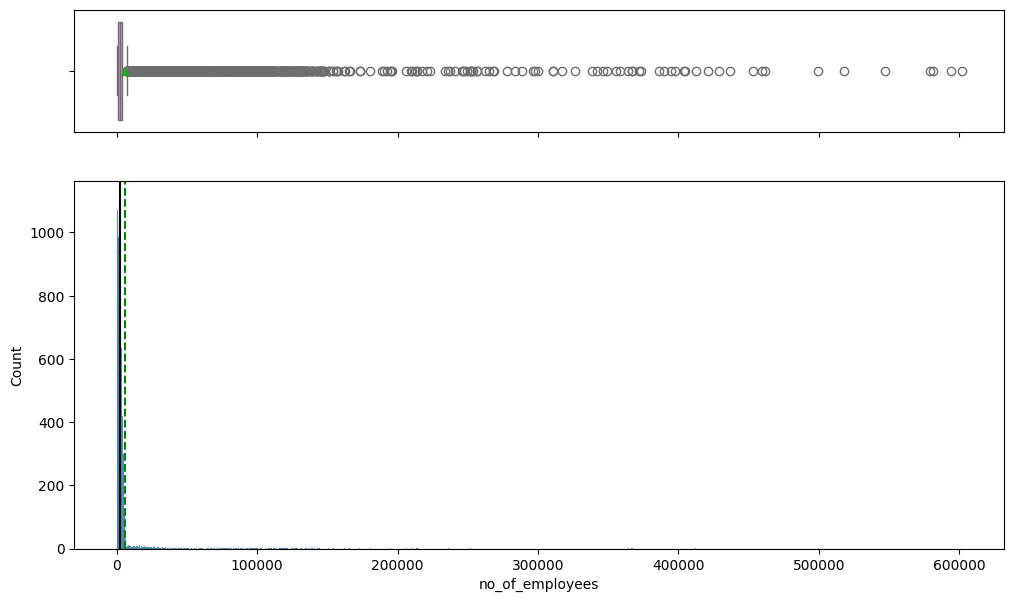

In [ ]:
histogram_boxplot(df, 'no_of_employees')

*   Highly skewed data.

###Bivariate Analysis

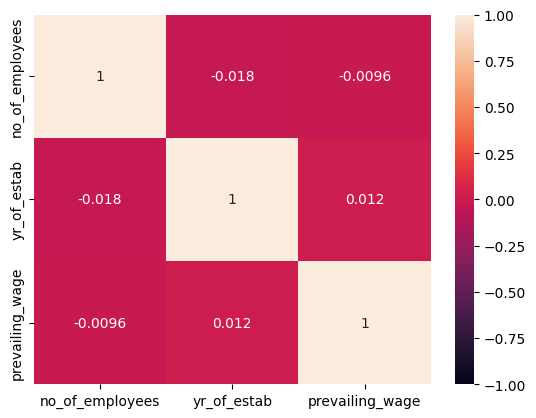

In [ ]:
sns.heatmap(data = df.corr(),annot=True,vmin=-1,vmax=1);

*   Can't find any correlation between the numerical columns.

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

####Observations with case_status

**How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


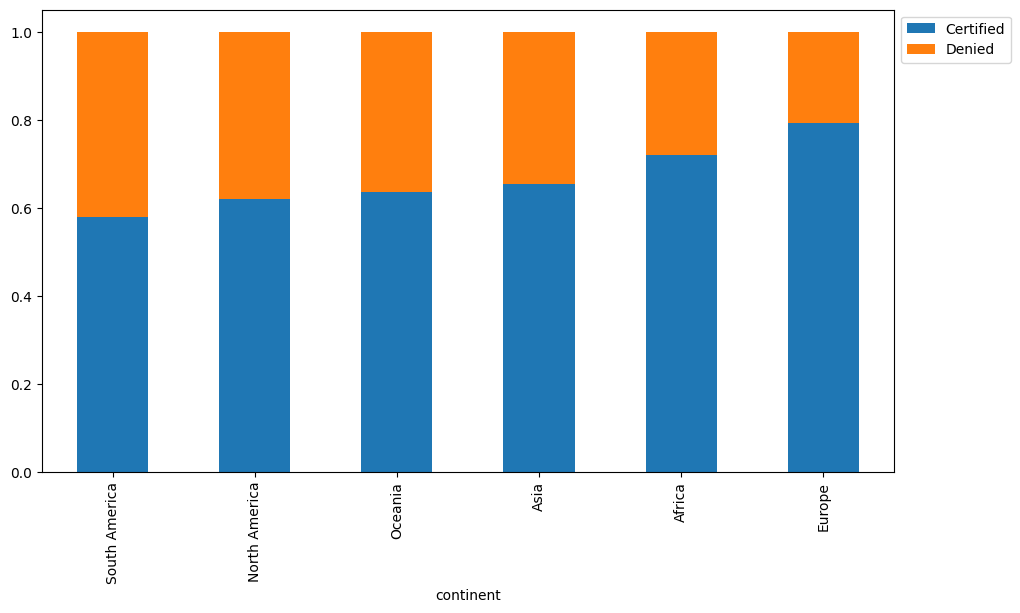

In [ ]:
stacked_barplot(df,'continent','case_status')

*   We can see 42% of the South American candidates have been denied visa.
*   Only 20% of the Europe candidates have been denied visa.
*   North America, Oceania and Asia have about 38% of visa denied cases.

**Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


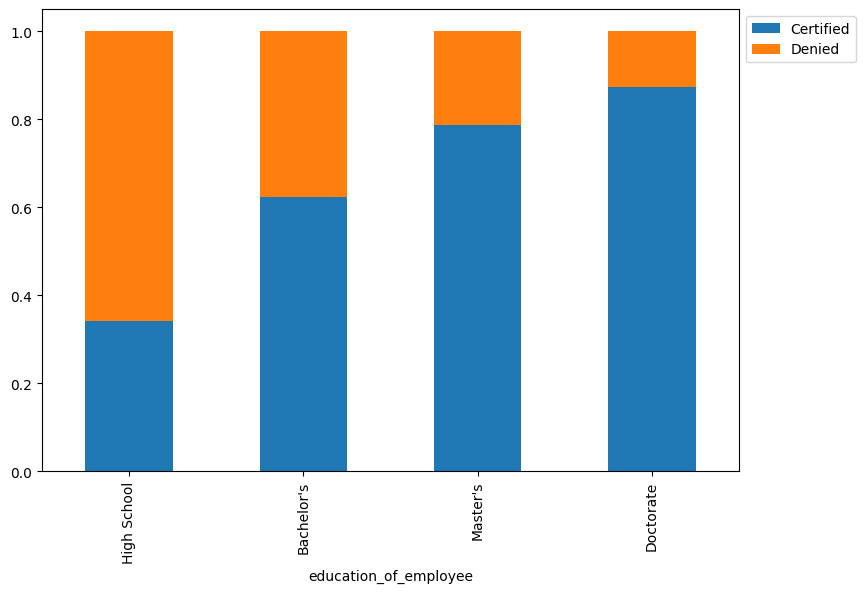

In [ ]:
stacked_barplot(df,'education_of_employee','case_status')

*   As we can see, majority of the visas have been denied if the highest education is only High School.
*   Candidates who have a Doctorate degreee have less visa denied.
*   Higher the educational degree, less chance of visas getting denied.

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


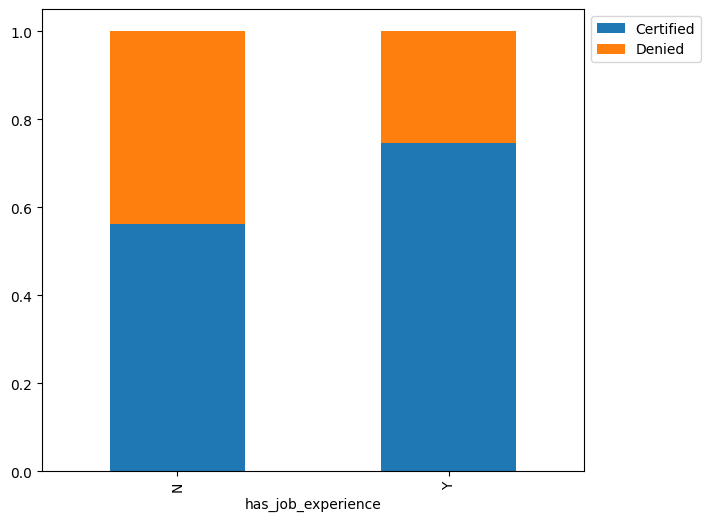

In [ ]:
stacked_barplot(df,'has_job_experience','case_status')

*   More than 40% of candidates have been denied visa if they don't have job experience.

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


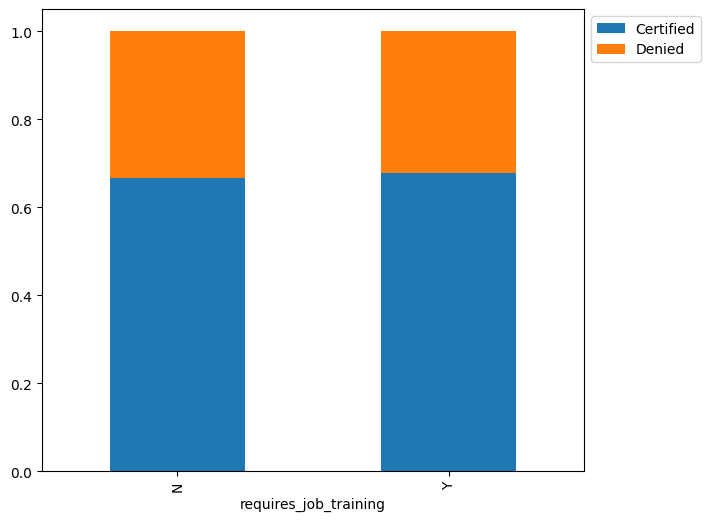

In [ ]:
stacked_barplot(df,'requires_job_training','case_status')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.requires_job_training, df.case_status)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 0.20777091770352887


*   Equal amount of visas have been denied if the candidate requires training at job or not.
*   There is enough statistical evidence to say requires_job_training and case_status variables are independent.

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


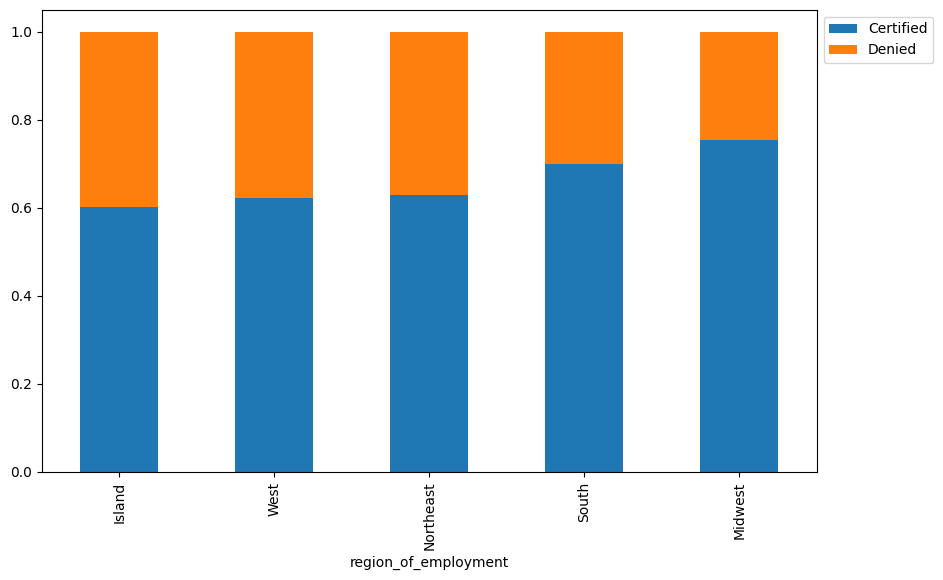

In [ ]:
stacked_barplot(df,'region_of_employment','case_status')

*   About 40% of candidates visas have been denied if the region of employment are from Island, West and Northeast.
*   Midwest have more candidates who's visa have been certified.

**In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


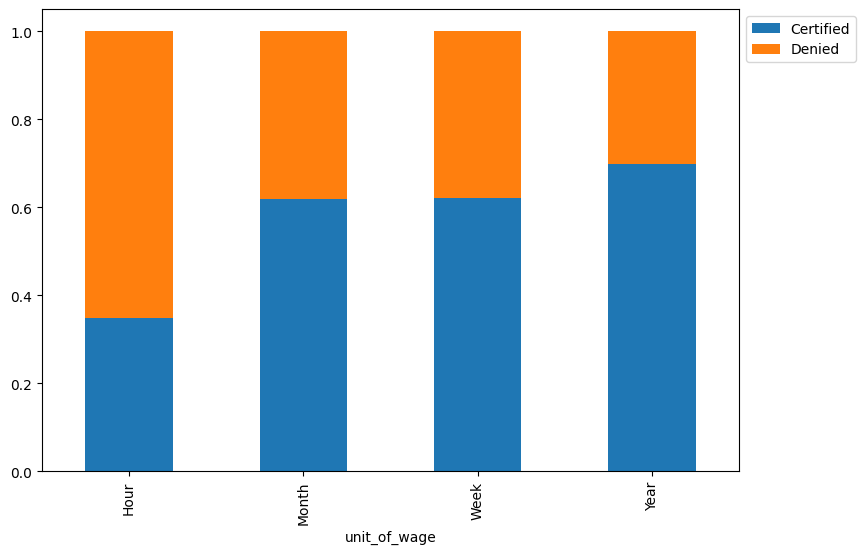

In [ ]:
stacked_barplot(df,'unit_of_wage','case_status')

*   More than 60% of the visa have been denied for hourly wage candidates.
*   About 30% of visa have been denied for yearly wage candidates.

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


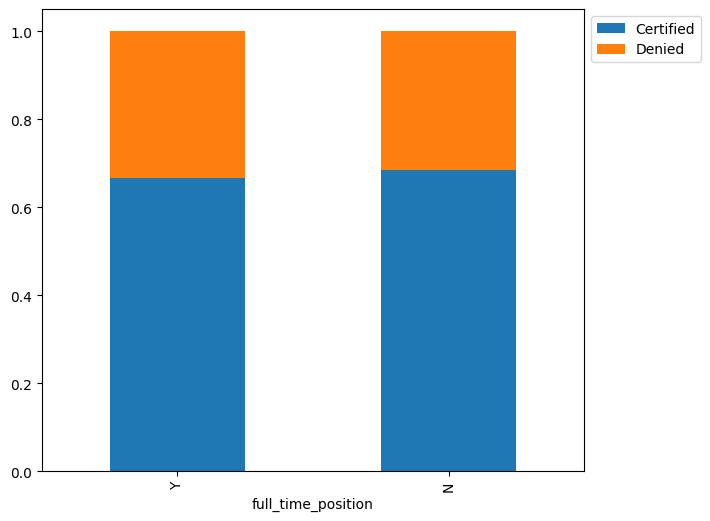

In [ ]:
stacked_barplot(df,'full_time_position','case_status')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.full_time_position, df.case_status)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 0.044015067433563045


*   The percentage of visas denied is almost very close even if the candidate have or not have a full time position.
*   We can say with the value of p that the variables are dependent on each other.

**The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

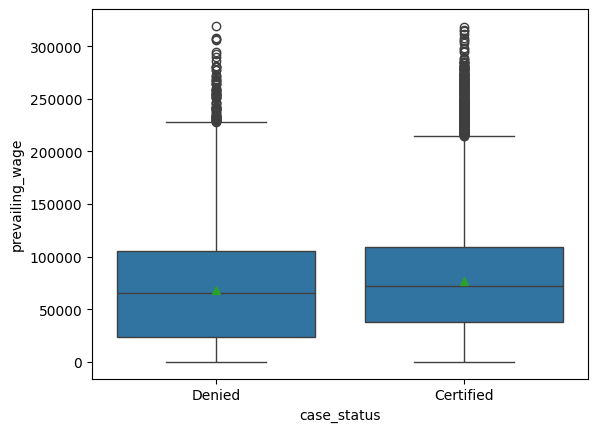

In [ ]:
sns.boxplot(data = df, x = 'case_status', y = 'prevailing_wage', showmeans = True);

*   The median of prevailing age is a little more for the candidates who have been certified a visa.

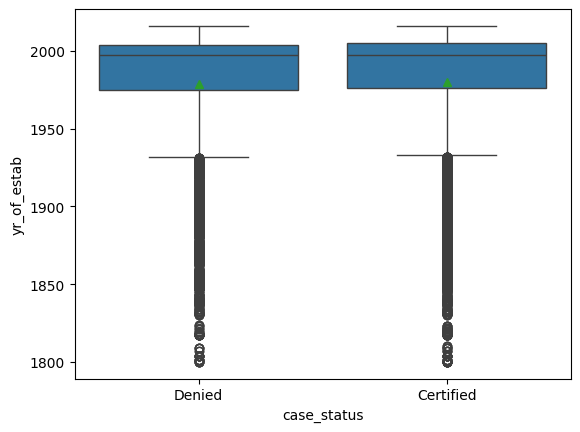

In [ ]:
sns.boxplot(data = df, x = 'case_status', y = 'yr_of_estab', showmeans = True);

*   The median of the certified and denied are almost equal.

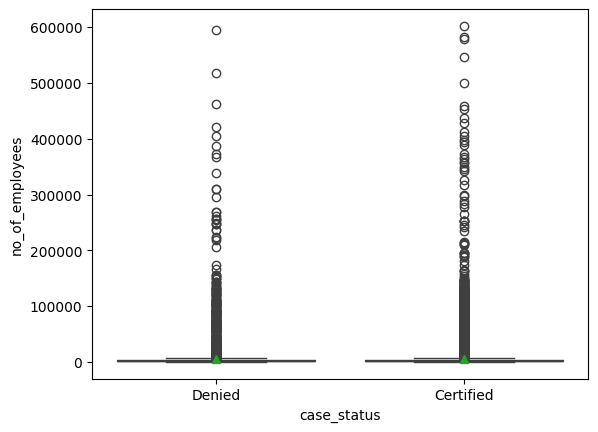

In [ ]:
sns.boxplot(data = df, x = 'case_status', y = 'no_of_employees', showmeans = True);

*   Highly skewed graphs.

####Observations on region_of_employment vs continent

continent             Africa   Asia  Europe  North America  Oceania  \
region_of_employment                                                  
All                      550  16840    3727           3287      192   
West                     137   3864    1458            833       57   
Northeast                212   4587     964           1111       49   
South                    102   4797     972            869       44   
Midwest                   91   3366     301            392       38   
Island                     8    226      32             82        4   

continent             South America    All  
region_of_employment                        
All                             851  25447  
West                            229   6578  
Northeast                       266   7189  
South                           222   7006  
Midwest                         111   4299  
Island                           23    375  
-----------------------------------------------------------------------

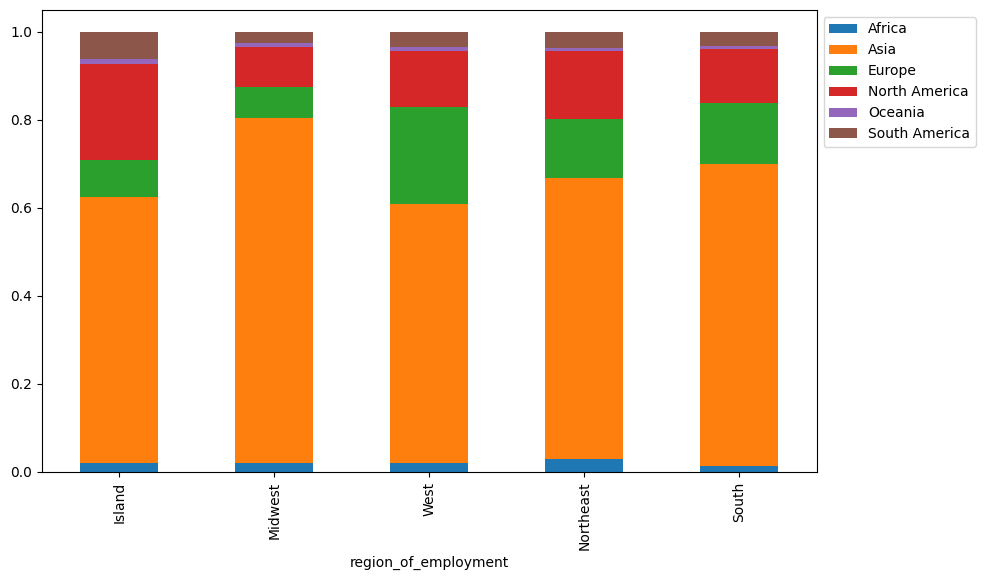

In [ ]:
stacked_barplot(df,'region_of_employment','continent')

*   Asians are dominating in all the regions. About 77% of Midwest employees in the dataset are Asians.
*   West has more percentage of Europeans.
*   The percentage of North Americans are more in Island region.

####Observations on region_of_employment vs has_job_experience

has_job_experience        N      Y    All
region_of_employment                     
All                   10661  14786  25447
Northeast              2930   4259   7189
South                  2915   4091   7006
West                   2702   3876   6578
Midwest                1959   2340   4299
Island                  155    220    375
------------------------------------------------------------------------------------------------------------------------


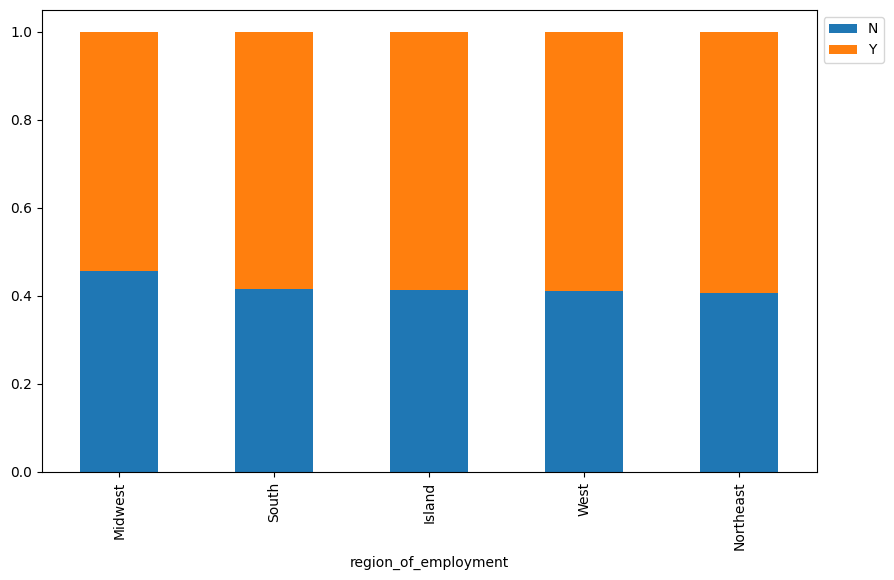

In [ ]:
stacked_barplot(df,'region_of_employment','has_job_experience')

*   About 45% of the midwest employees does not have job experience.
*   Other regions have about 40% of employees who do not have job experience.

####Observations on region_of_employment vs requires_job_training

requires_job_training      N     Y    All
region_of_employment                     
All                    22498  2949  25447
South                   5867  1139   7006
West                    5626   952   6578
Northeast               6585   604   7189
Midwest                 4067   232   4299
Island                   353    22    375
------------------------------------------------------------------------------------------------------------------------


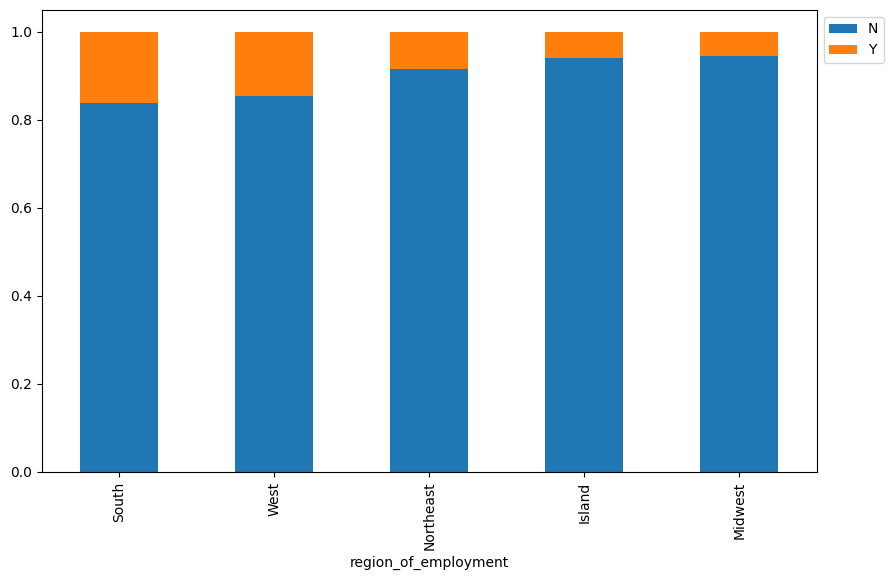

In [ ]:
stacked_barplot(df,'region_of_employment','requires_job_training')

*   Around 15% of candidates from South region requires job taining.
*   Island region candidates has least percentage of candidates who requires job training.

####Observations on region_of_employment vs unit_of_wage

unit_of_wage          Hour  Month  Week   Year    All
region_of_employment                                 
All                   2153     89   272  22933  25447
Northeast              863     29    92   6205   7189
South                  695     28    68   6215   7006
West                   431     19    77   6051   6578
Midwest                146     13    32   4108   4299
Island                  18      0     3    354    375
------------------------------------------------------------------------------------------------------------------------


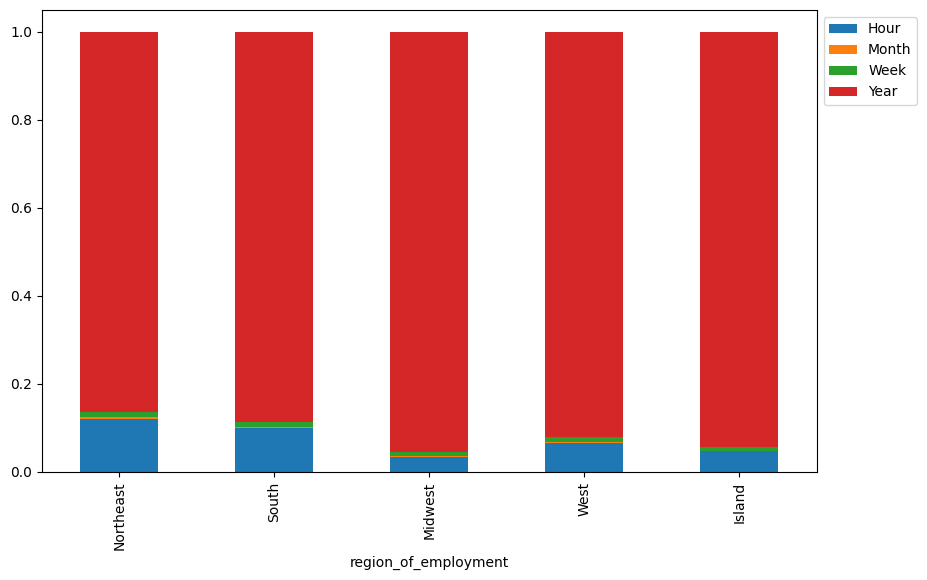

In [ ]:
stacked_barplot(df,'region_of_employment','unit_of_wage')

*   Yearly wage workers dominates all the regions.
*   Northeast has about 10% of candidates who have hourly wage.

####Observations on region_of_employment vs education_of_employee

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10220       2189         3416      9622  25447
West                         2919        713          785      2161   6578
Northeast                    2870        656          905      2758   7189
South                        2987        541          931      2547   7006
Midwest                      1315        254          735      1995   4299
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


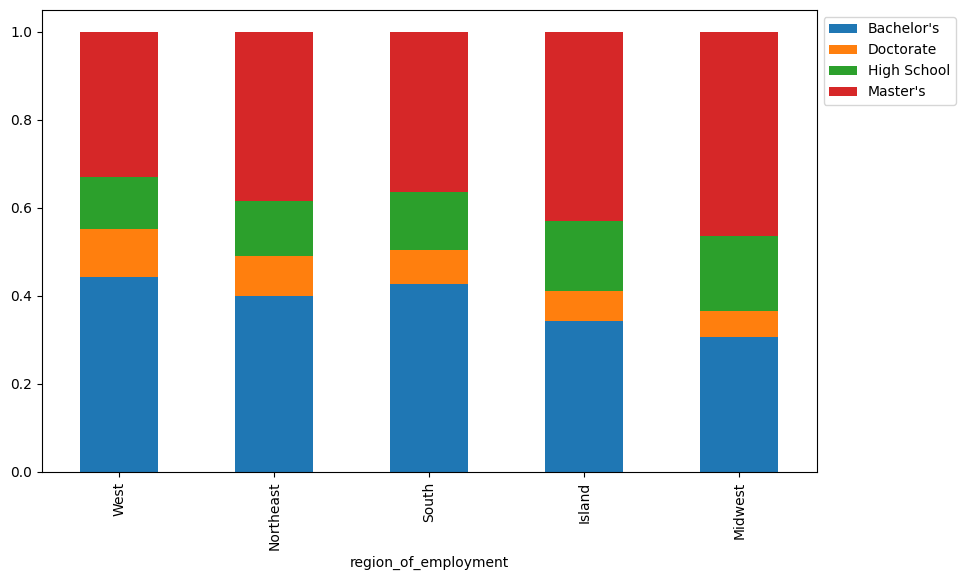

In [ ]:
stacked_barplot(df,'region_of_employment','education_of_employee')

*   40% of candidates from Midwest have Masters degree.
*   10% of candidates from West have Doctorate degree.
*   West and South have 45% of candidates with Bachelors degree.

####Observations on education_of_employee vs has_job_experience

has_job_experience         N      Y    All
education_of_employee                     
All                    10661  14786  25447
Bachelor's              4340   5880  10220
Master's                3988   5634   9622
High School             1393   2023   3416
Doctorate                940   1249   2189
------------------------------------------------------------------------------------------------------------------------


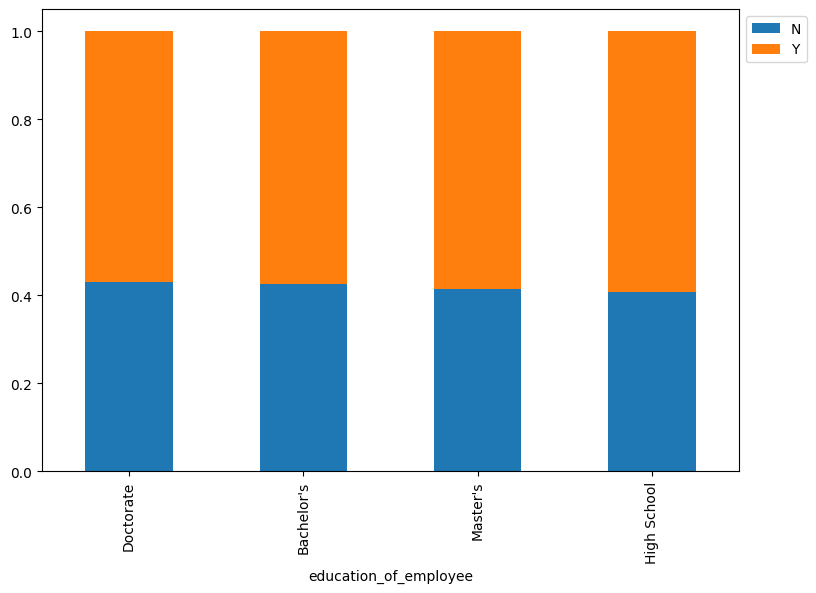

In [ ]:
stacked_barplot(df,'education_of_employee','has_job_experience')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.education_of_employee, df.has_job_experience)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 0.1795365179994074


*   Education_of_employee and has_job_experience are independent of each other.

####Observations on education_of_employee vs requires_job_training

requires_job_training      N     Y    All
education_of_employee                    
All                    22498  2949  25447
Bachelor's              8962  1258  10220
Master's                8775   847   9622
High School             2986   430   3416
Doctorate               1775   414   2189
------------------------------------------------------------------------------------------------------------------------


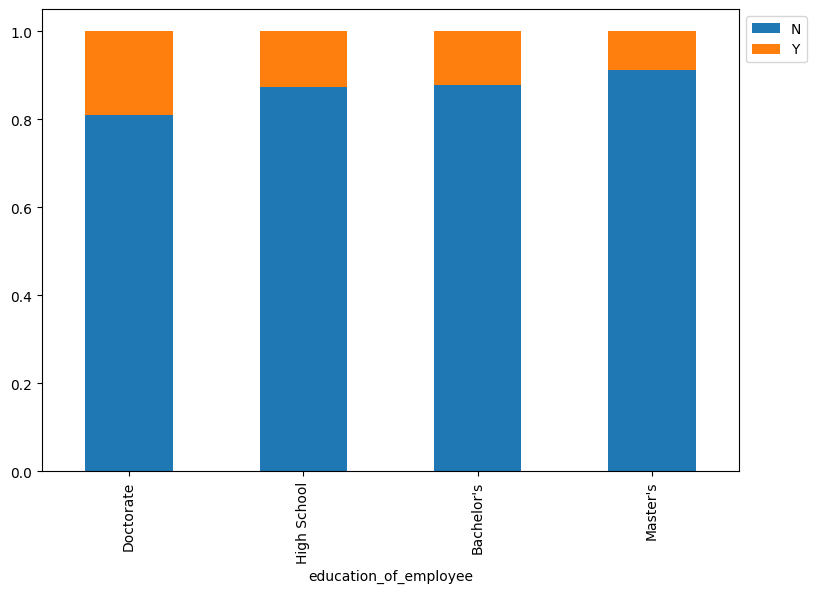

In [ ]:
stacked_barplot(df,'education_of_employee','requires_job_training')

*   About 20% of candidates who have a Doctorate degree requires a job training.
*   Only 10% of candidates who have a Masters degree requires job training.

####Observations on education_of_employee vs full_time_position

full_time_position        N      Y    All
education_of_employee                    
All                    2706  22741  25447
Master's               1738   7884   9622
Bachelor's              683   9537  10220
High School             205   3211   3416
Doctorate                80   2109   2189
------------------------------------------------------------------------------------------------------------------------


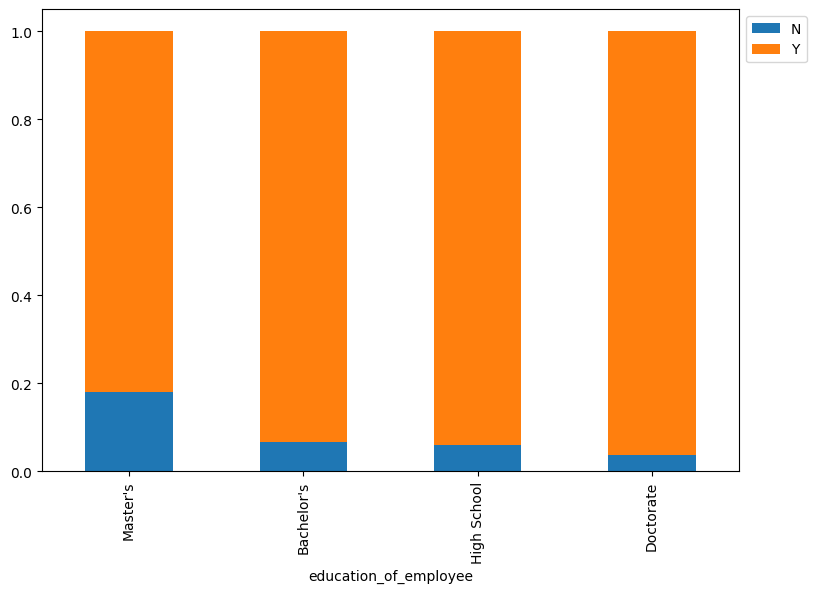

In [ ]:
stacked_barplot(df,'education_of_employee','full_time_position')

*   About 80% of candidates with Masters degree have full time position.
*   Only 5% of candidates who have Doctorate degree does not have a full time position.
*   90% of candidates with Bachelors or high school degree have full time job.

####Observations on education_of_employee vs unit_of_wage

unit_of_wage           Hour  Month  Week   Year    All
education_of_employee                                 
All                    2153     89   272  22933  25447
Bachelor's              978     41   126   9075  10220
Master's                684     30   106   8802   9622
High School             395     13    32   2976   3416
Doctorate                96      5     8   2080   2189
------------------------------------------------------------------------------------------------------------------------


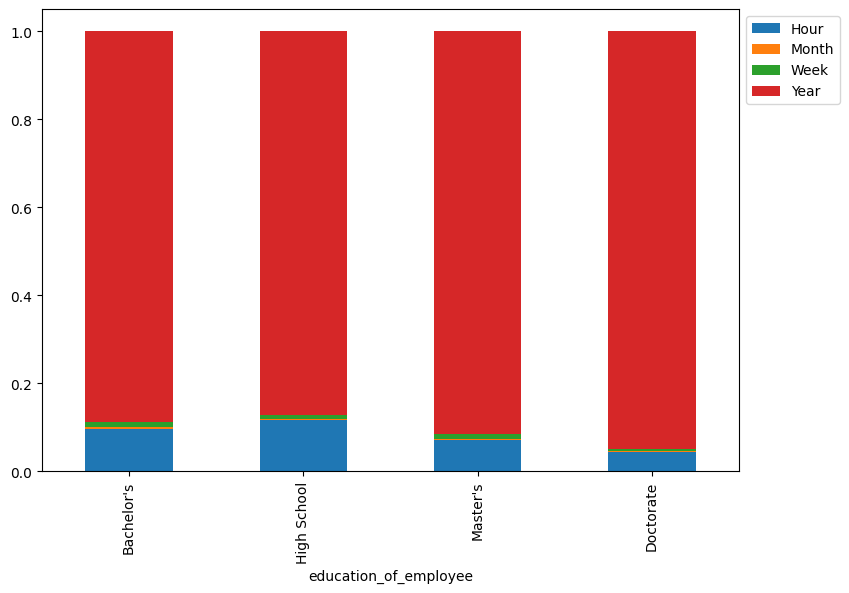

In [ ]:
stacked_barplot(df,'education_of_employee','unit_of_wage')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.education_of_employee, df.unit_of_wage)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 5.370068007324859e-27


*   These two variables are dependent on each other.
*   Almost 95% of Doctorate candidates have yearly wage.
*   Approximately 12% High school candidates have Hourly wage.

####Observations on has_job_experience vs continent

has_job_experience      N      Y    All
continent                              
All                 10661  14786  25447
Asia                 7058   9782  16840
Europe               1574   2153   3727
North America        1346   1941   3287
South America         377    474    851
Africa                217    333    550
Oceania                89    103    192
------------------------------------------------------------------------------------------------------------------------


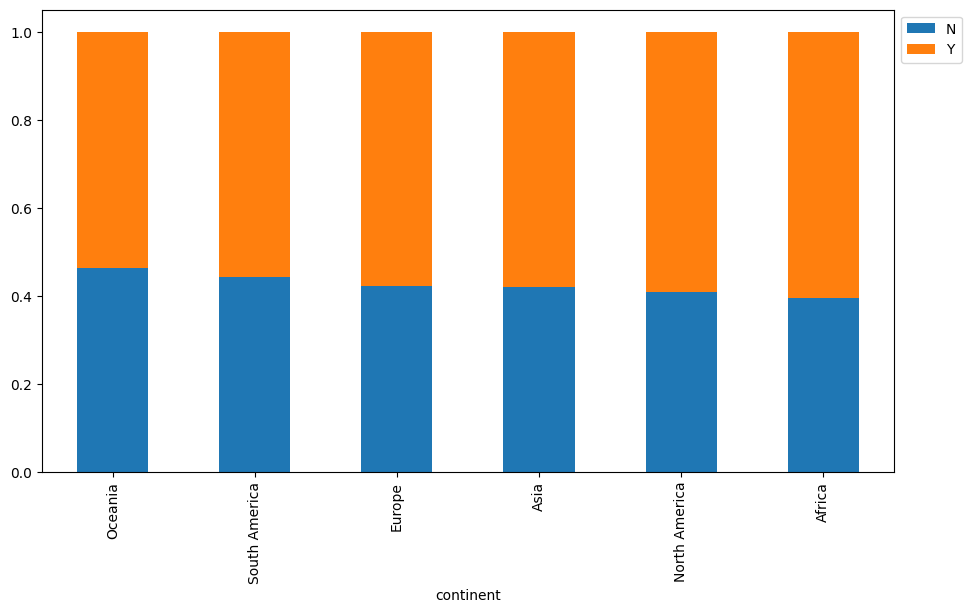

In [ ]:
stacked_barplot(df,'continent','has_job_experience')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.continent, df.has_job_experience)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 0.27617865502029015


*   These two variables are independent of each other.

####Observations on has_job_experience vs requires_job_training

has_job_experience         N      Y    All
requires_job_training                     
All                    10661  14786  25447
N                       8976  13522  22498
Y                       1685   1264   2949
------------------------------------------------------------------------------------------------------------------------


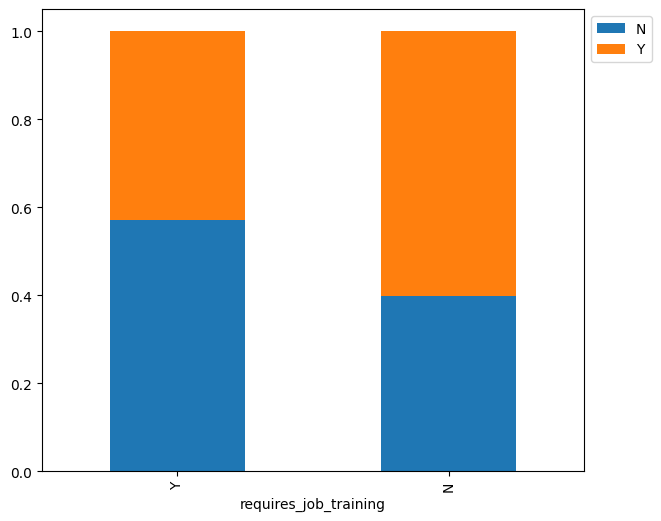

In [ ]:
stacked_barplot(df,'requires_job_training','has_job_experience')

*   Almost 60% of candidates who requires a job training does not have job experience.

####Observations on has_job_experience vs unit_of_wage

has_job_experience      N      Y    All
unit_of_wage                           
All                 10661  14786  25447
Year                 9193  13740  22933
Hour                 1363    790   2153
Week                   73    199    272
Month                  32     57     89
------------------------------------------------------------------------------------------------------------------------


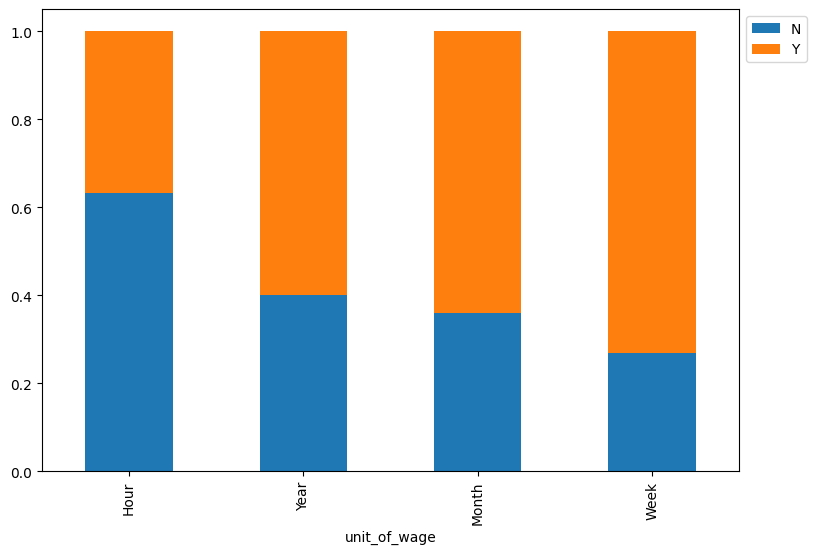

In [ ]:
stacked_barplot(df,'unit_of_wage','has_job_experience')

*   62% of candidates with Hourly wage have no job experience.
*   70& of candidates with Weekly wage have job experience.

####Observations on has_job_experience vs full_time_position

has_job_experience      N      Y    All
full_time_position                     
All                 10661  14786  25447
Y                    9365  13376  22741
N                    1296   1410   2706
------------------------------------------------------------------------------------------------------------------------


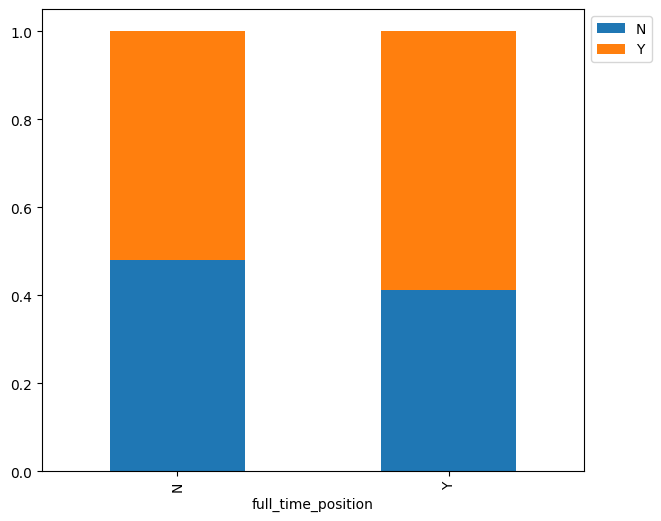

In [ ]:
stacked_barplot(df,'full_time_position','has_job_experience')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.full_time_position, df.has_job_experience)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 2.5640287488321876e-11


*   full_time_position and has_job_experience are dependent on each other.
*   About 60% candidates who have full time has job experience.

####Observations on full_time_position vs requires_job_training

requires_job_training      N     Y    All
full_time_position                       
All                    22498  2949  25447
Y                      19843  2898  22741
N                       2655    51   2706
------------------------------------------------------------------------------------------------------------------------


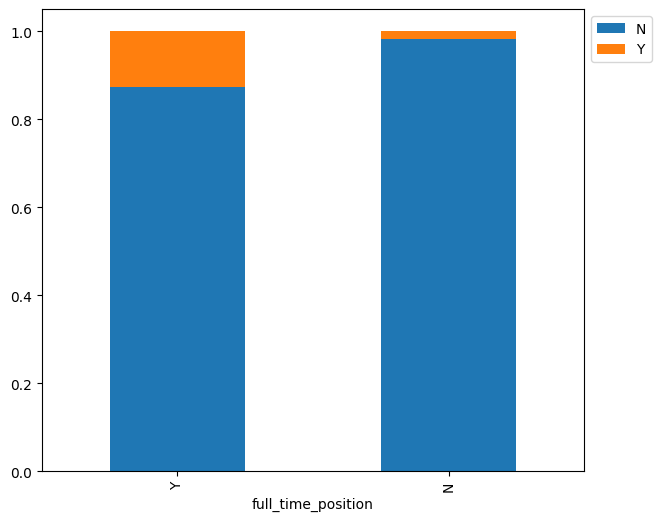

In [ ]:
stacked_barplot(df,'full_time_position','requires_job_training')

*   10% of candidates who have full time requires job training.
*   2% of candidates who does not have full time requires job training.

####Observations on full_time_position vs unit_of_wage

full_time_position     N      Y    All
unit_of_wage                          
All                 2706  22741  25447
Year                2672  20261  22933
Hour                  19   2134   2153
Week                  10    262    272
Month                  5     84     89
------------------------------------------------------------------------------------------------------------------------


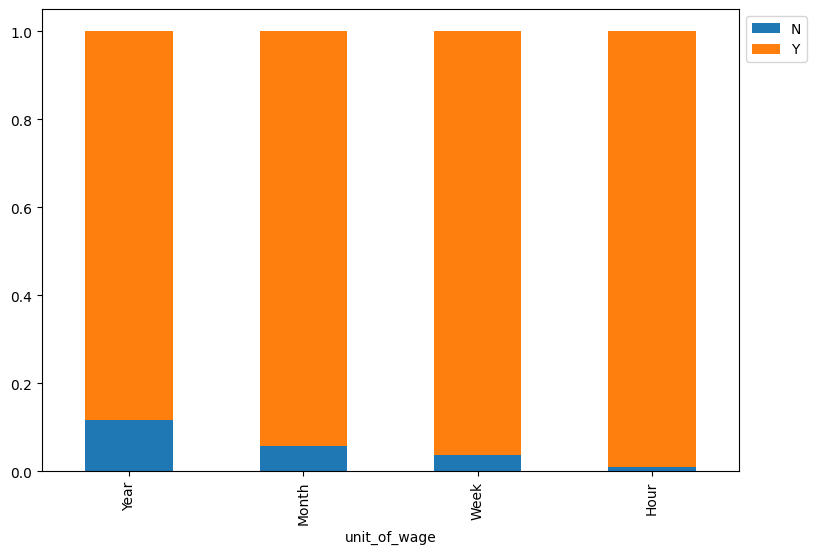

In [ ]:
stacked_barplot(df,'unit_of_wage','full_time_position')

*   98% of hourly wage workers have full time position.

####Observations on unit_of_wage vs prevailing_wage

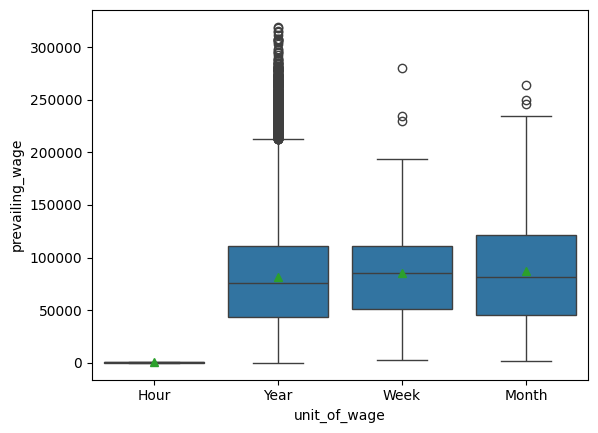

In [ ]:
sns.boxplot(data = df, x = 'unit_of_wage', y = 'prevailing_wage', showmeans = True);

*   The median of Weekly wage employees have more prevailing wage.
*   Hourly wage employees have low prevailing wage.

####Observations on region_of_employment vs prevailing_wage

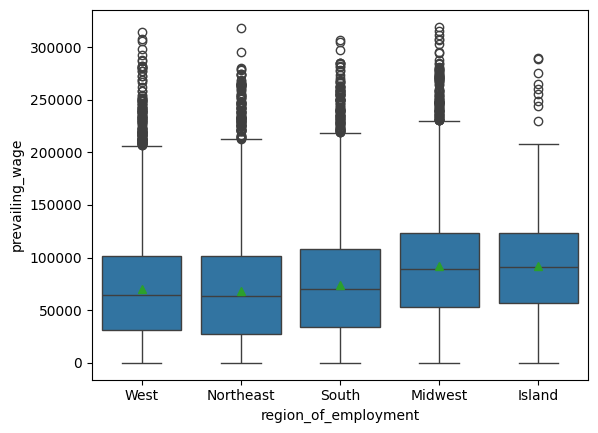

In [ ]:
sns.boxplot(data = df, x = 'region_of_employment', y = 'prevailing_wage', showmeans = True);

*   The median of the prevailing wage is more in Midwest and Island regions.
*   The mean and median of the prevailing wage is almost equal in all the different regions.

####Observations on education_of_employee vs prevailing_wage

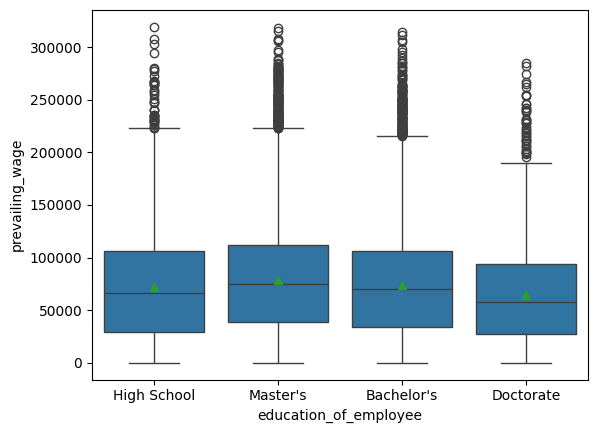

In [ ]:
sns.boxplot(data = df, x = 'education_of_employee', y = 'prevailing_wage', showmeans = True);

*   The median of the candidates who have Masters degree have the highest prevailing wage.
*   The median of the candidates who have Doctorate degree have the least prevailing wage.

## Data Preprocessing

###Outlier detection and treatment

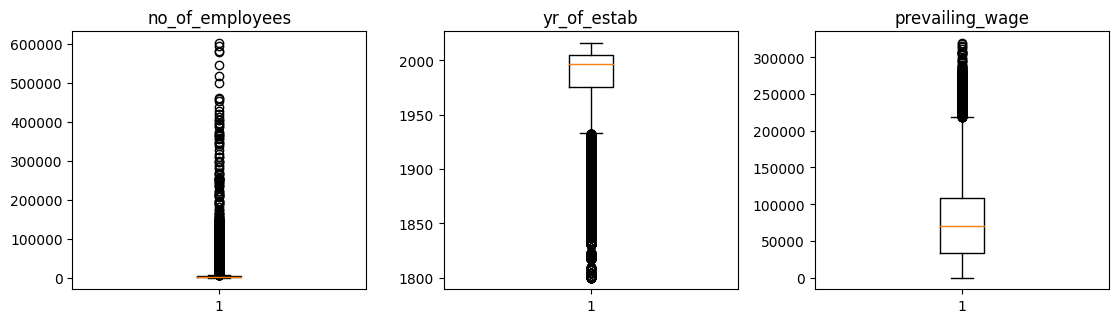

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
df = df.drop(['no_of_employees','yr_of_estab'], axis = 1)

We can ignore the outliers in prevailing_wage colum . We can drop no_of_employees and yr_of_stab columns as it does not add value to the model.

###Preparing data for modeling

In [ ]:
X = df.drop('case_status', axis=1)
y = df['case_status'].apply(lambda x : 1 if x=='Certified' else 0 )

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [ ]:
print("Number of rows in train data =", X_train.shape)
print("Number of rows in test data =", X_test.shape)

Number of rows in train data = (17812, 19)
Number of rows in test data = (7635, 19)


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.668089
0    0.331911
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.668107
0    0.331893
Name: case_status, dtype: float64


## EDA

###Univariate Analysis

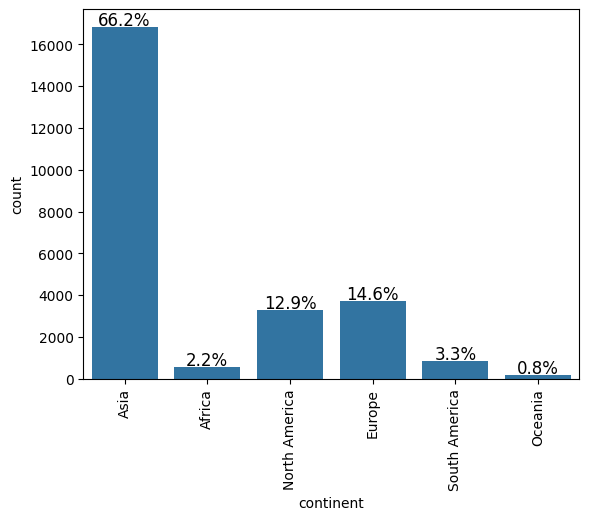

In [ ]:
countplots(df, 'continent', perc = True)

*   66% of the candidates are from Asia followed by 14.6% from Europe.
*   Oceania has the least number of candidates.

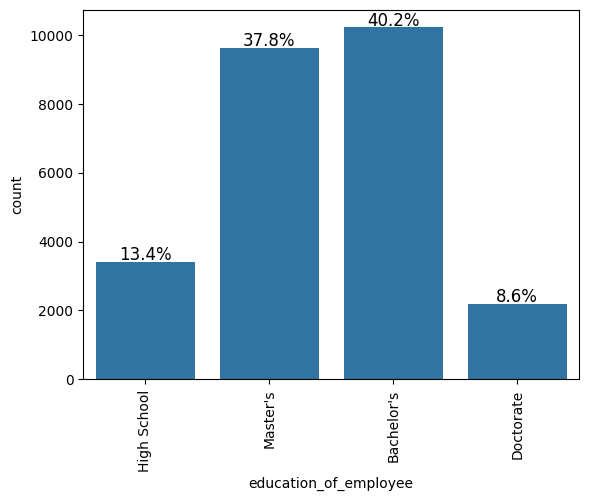

In [ ]:
countplots(df, 'education_of_employee', perc = True)

*   4About 40% of the candidates have a Bachelor's degree followed by 37.8% candidates having a Master's degreee.
*   8.6% candidates have Doctorate degree.

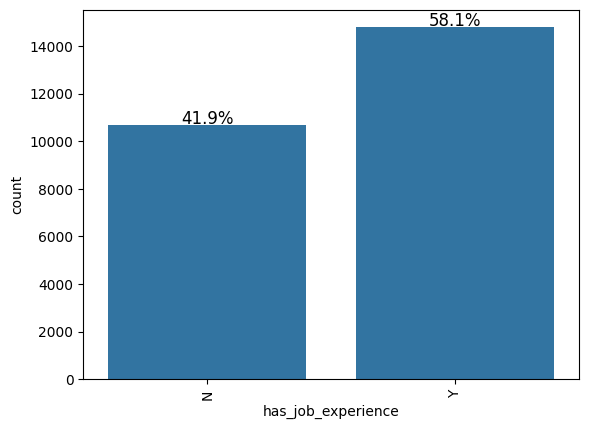

In [ ]:
countplots(df, 'has_job_experience', perc = True)

*   Abot 58% of the candidates have job experience.

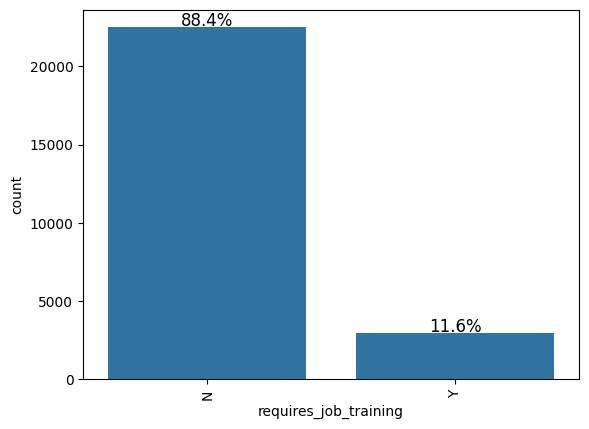

In [ ]:
countplots(df, 'requires_job_training', perc = True)

*   Only 11.6% of the candidates need job training.

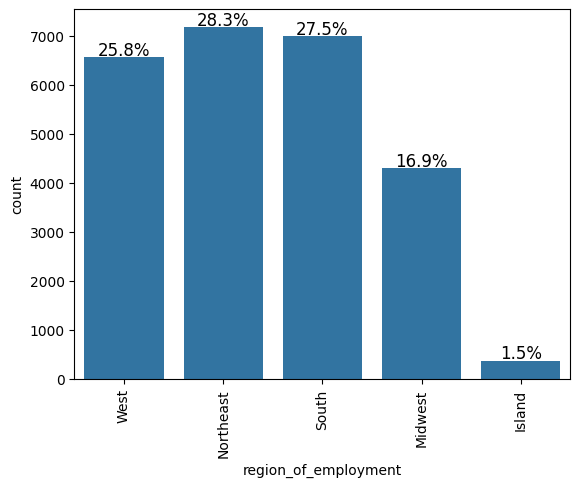

In [ ]:
countplots(df, 'region_of_employment', perc = True)

*   28.3% of the candidates are working from the Northeast region followed by 27.5% of the candidates working from South region.
*   Only 1.5% of the candidates are working from the Island region.

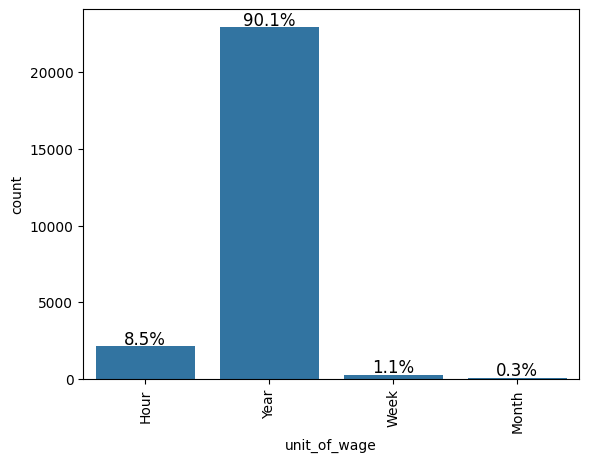

In [ ]:
countplots(df, 'unit_of_wage', perc = True)

*   90% of the candidates have Yearly wage followed b 8.5% candidates having Hourly wage.
*   Only 0.3% candidates have Monthly wage.

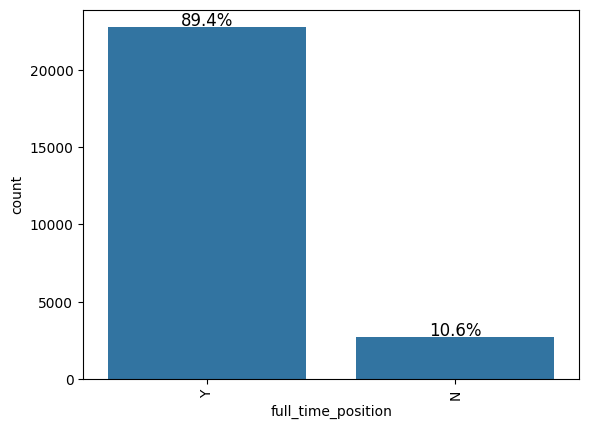

In [ ]:
countplots(df, 'full_time_position', perc = True)

*   89.4% of the candidates have a full-time job in a company.

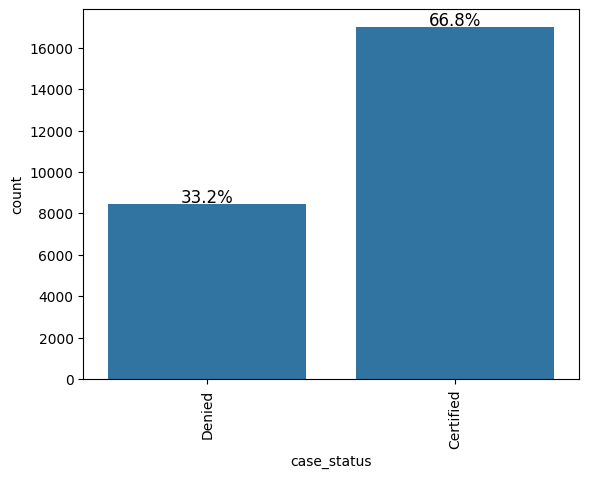

In [ ]:
countplots(df, 'case_status', perc = True)

*   Almost 67% of the candidates have been certified a visa.

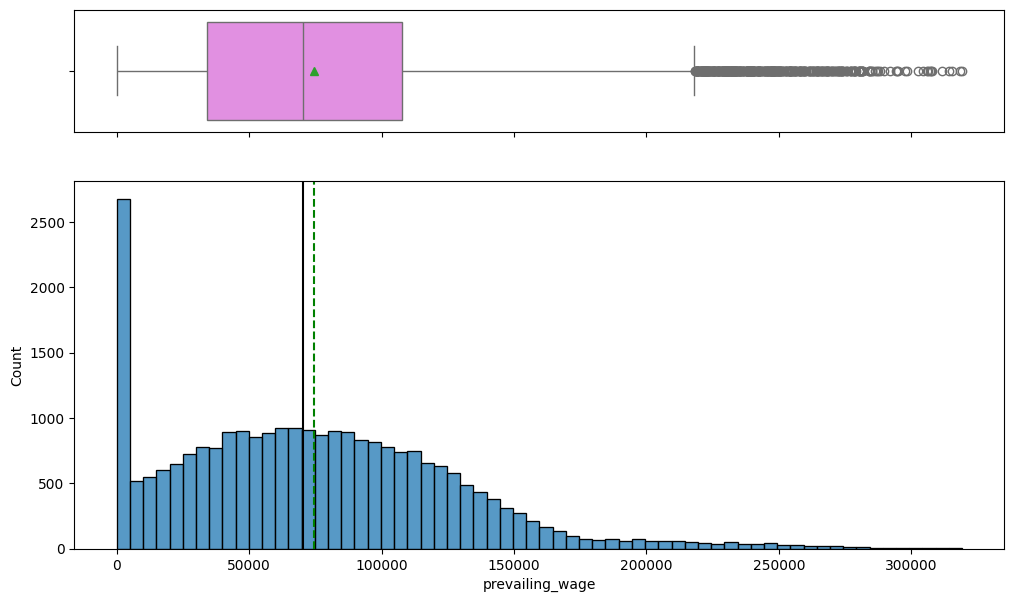

In [ ]:
histogram_boxplot(df, 'prevailing_wage')

*   The mean and the median of prevailing age column is somewhat close to each other.

###Bivariate Analysis

####Observations with case_status

**How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


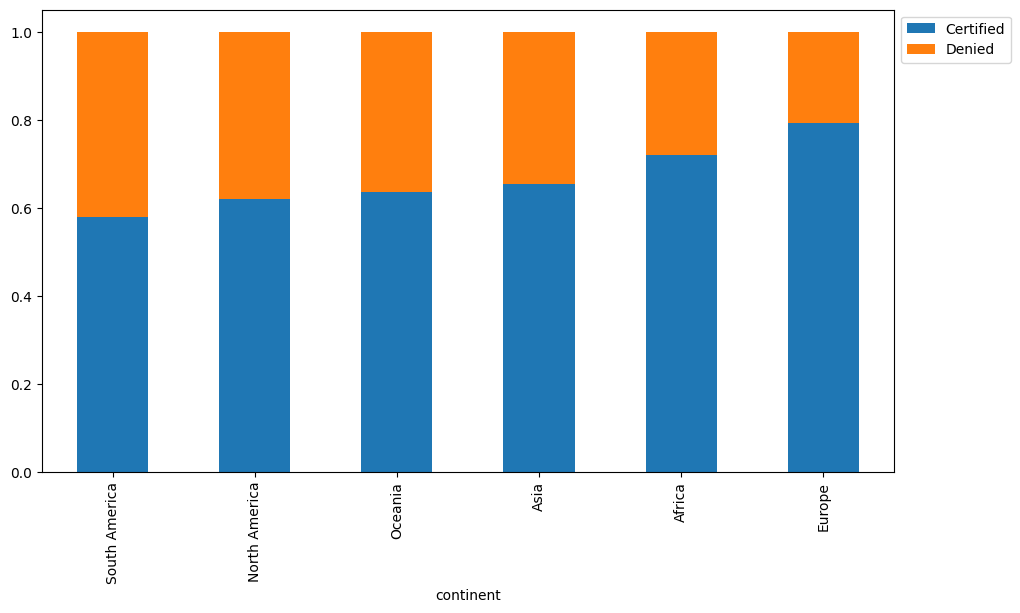

In [ ]:
stacked_barplot(df,'continent','case_status')

*   We can see 42% of the South American candidates have been denied visa.
*   Only 20% of the Europe candidates have been denied visa.
*   North America, Oceania and Asia have about 38% of visa denied cases.

**Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


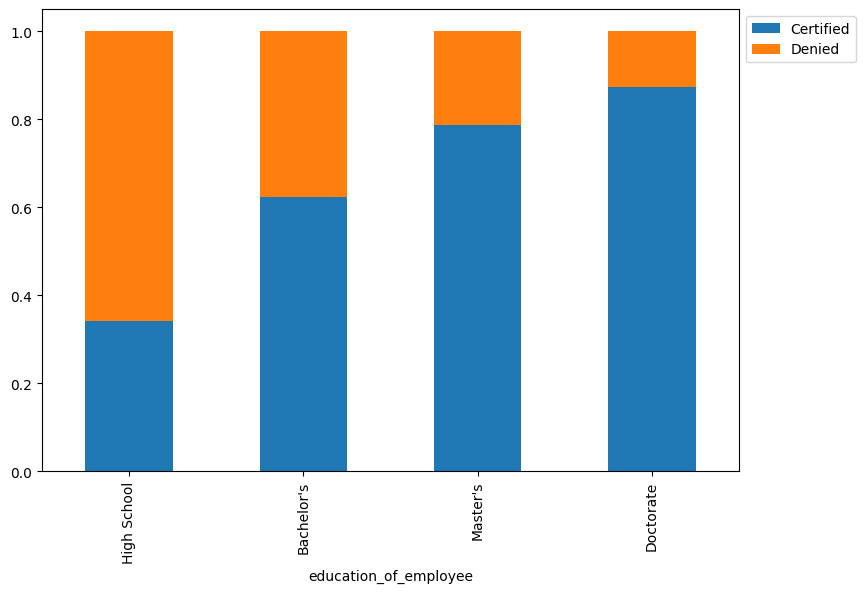

In [ ]:
stacked_barplot(df,'education_of_employee','case_status')

*   As we can see, majority of the visas have been denied if the highest education is only High School.
*   Candidates who have a Doctorate degreee have less visa denied.
*   Higher the educational degree, less chance of visas getting denied.

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


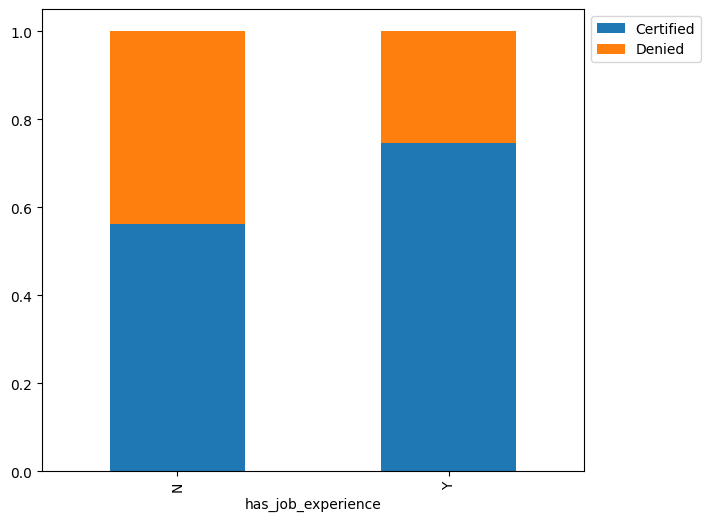

In [ ]:
stacked_barplot(df,'has_job_experience','case_status')

*   More than 40% of candidates have been denied visa if they don't have job experience.

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


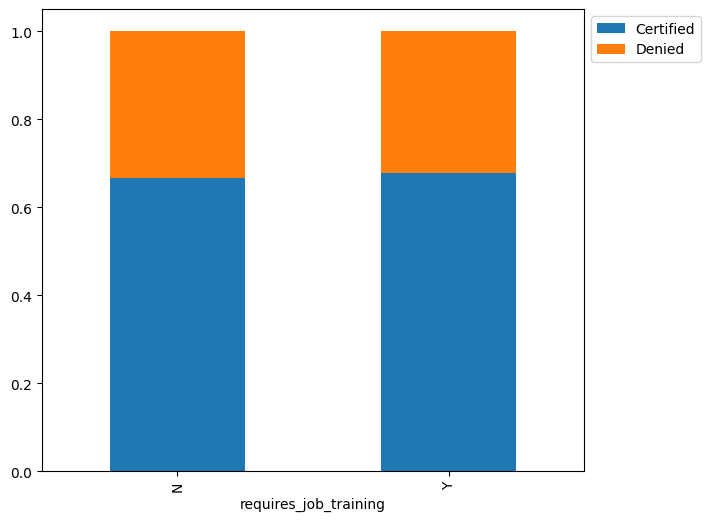

In [ ]:
stacked_barplot(df,'requires_job_training','case_status')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.requires_job_training, df.case_status)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 0.20777091770352887


*   Equal amount of visas have been denied if the candidate requires training at job or not.
*   There is enough statistical evidence to say requires_job_training and case_status variables are independent.

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


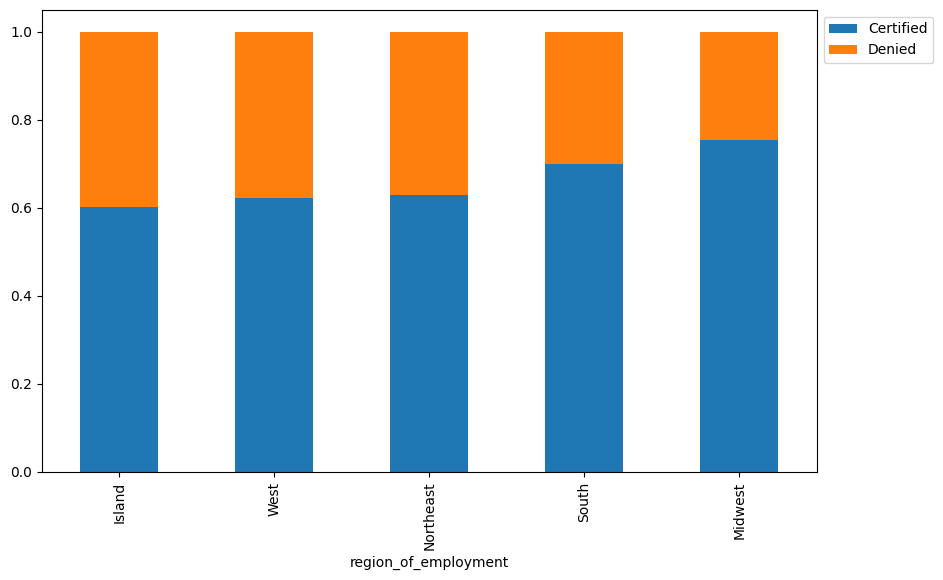

In [ ]:
stacked_barplot(df,'region_of_employment','case_status')

*   About 40% of candidates visas have been denied if the region of employment are from Island, West and Northeast.
*   Midwest have more candidates who's visa have been certified.

**In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


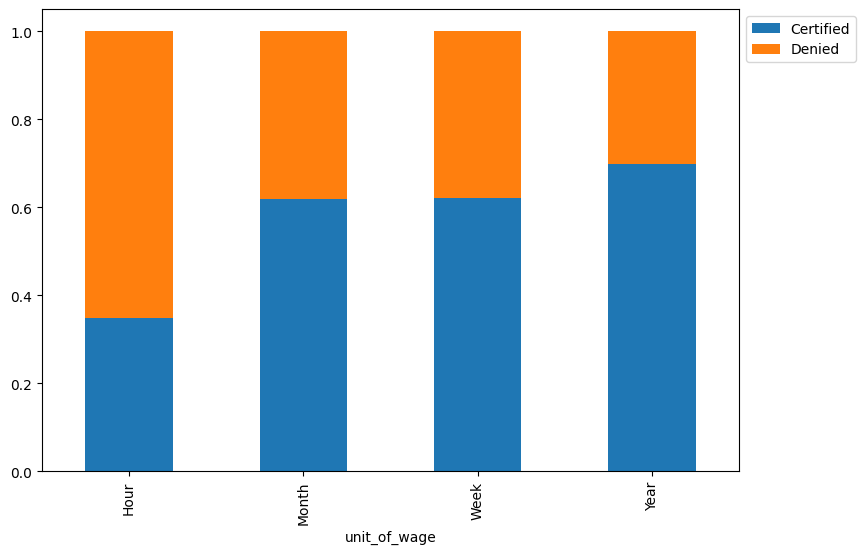

In [ ]:
stacked_barplot(df,'unit_of_wage','case_status')

*   More than 60% of the visa have been denied for hourly wage candidates.
*   About 30% of visa have been denied for yearly wage candidates.

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


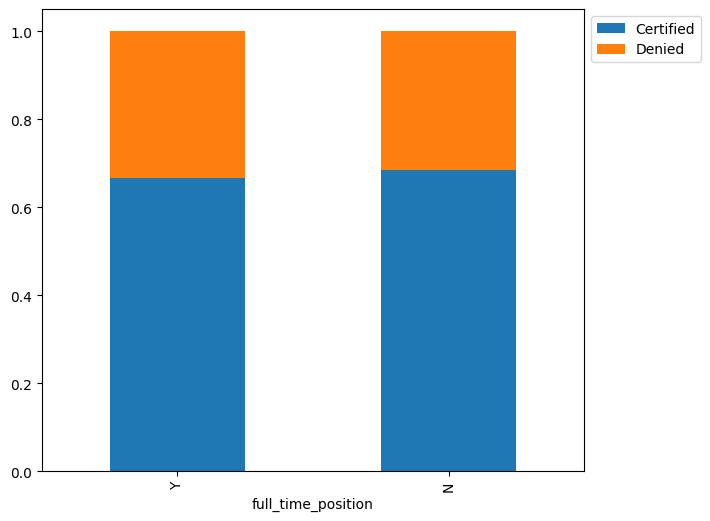

In [ ]:
stacked_barplot(df,'full_time_position','case_status')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.full_time_position, df.case_status)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 0.044015067433563045


*   The percentage of visas denied is almost very close even if the candidate have or not have a full time position.
*   We can say with the value of p that the variables are dependent on each other.

**The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

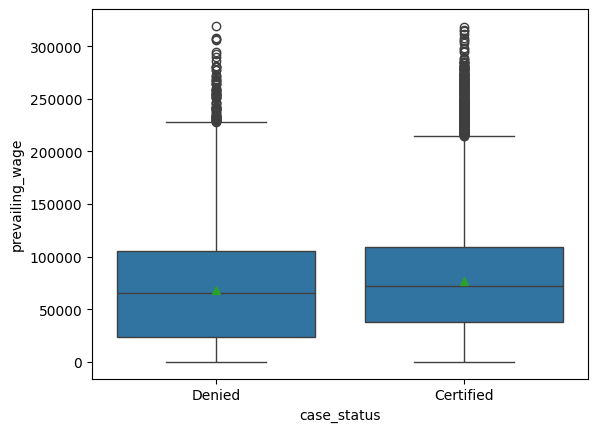

In [ ]:
sns.boxplot(data = df, x = 'case_status', y = 'prevailing_wage', showmeans = True);

*   The median of prevailing age is a little more for the candidates who have been certified a visa.

####Observations on education_of_employee vs has_job_experience

has_job_experience         N      Y    All
education_of_employee                     
All                    10661  14786  25447
Bachelor's              4340   5880  10220
Master's                3988   5634   9622
High School             1393   2023   3416
Doctorate                940   1249   2189
------------------------------------------------------------------------------------------------------------------------


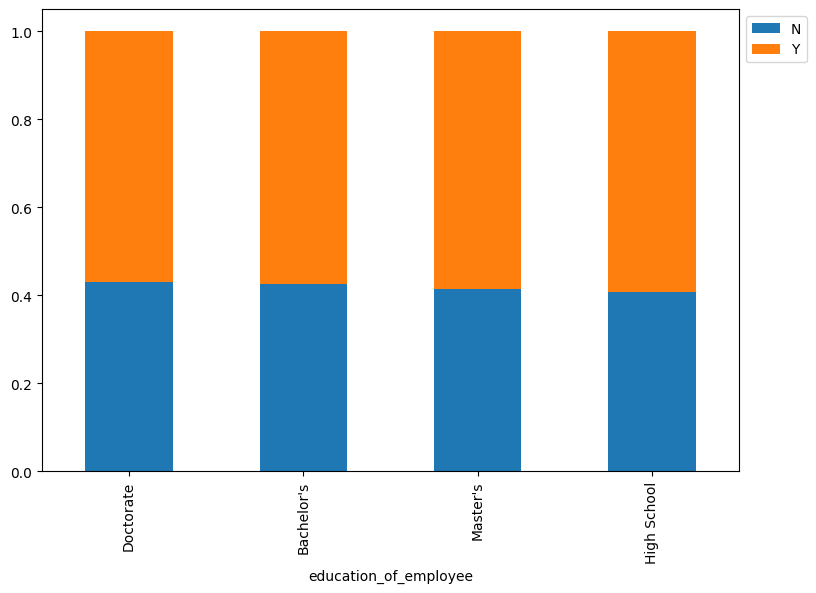

In [ ]:
stacked_barplot(df,'education_of_employee','has_job_experience')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.education_of_employee, df.has_job_experience)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 0.1795365179994074


*   Education_of_employee and has_job_experience are independent of each other.

####Observations on education_of_employee vs requires_job_training

requires_job_training      N     Y    All
education_of_employee                    
All                    22498  2949  25447
Bachelor's              8962  1258  10220
Master's                8775   847   9622
High School             2986   430   3416
Doctorate               1775   414   2189
------------------------------------------------------------------------------------------------------------------------


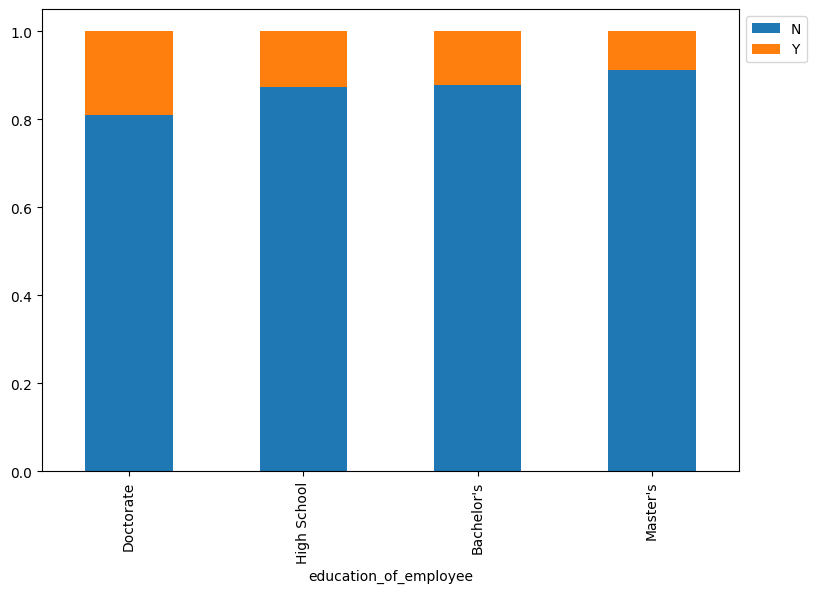

In [ ]:
stacked_barplot(df,'education_of_employee','requires_job_training')

*   About 20% of candidates who have a Doctorate degree requires a job training.
*   Only 10% of candidates who have a Masters degree requires job training.

####Observations on education_of_employee vs unit_of_wage

unit_of_wage           Hour  Month  Week   Year    All
education_of_employee                                 
All                    2153     89   272  22933  25447
Bachelor's              978     41   126   9075  10220
Master's                684     30   106   8802   9622
High School             395     13    32   2976   3416
Doctorate                96      5     8   2080   2189
------------------------------------------------------------------------------------------------------------------------


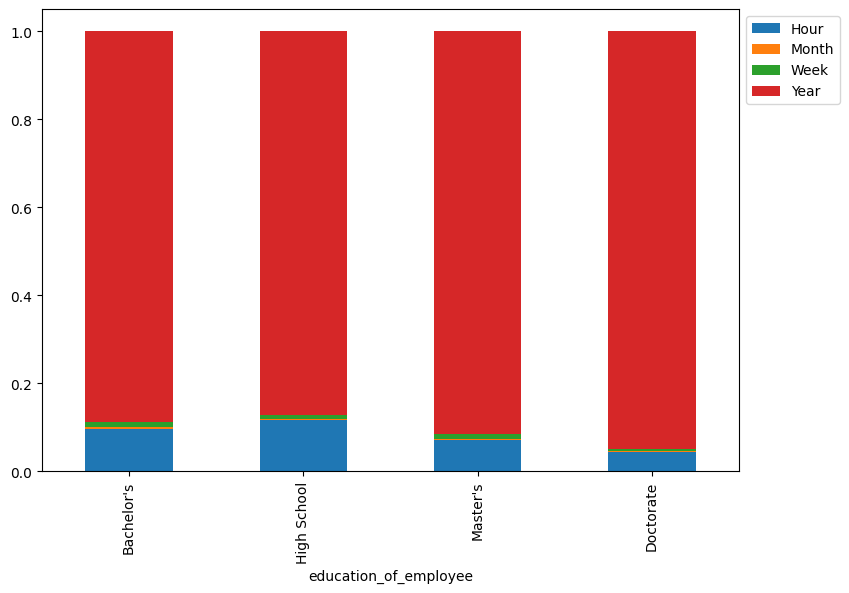

In [ ]:
stacked_barplot(df,'education_of_employee','unit_of_wage')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.education_of_employee, df.unit_of_wage)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 5.370068007324859e-27


*   These two variables are dependent on each other.
*   Almost 95% of Doctorate candidates have yearly wage.
*   Approximately 12% High school candidates have Hourly wage.

####Observations on has_job_experience vs requires_job_training

has_job_experience         N      Y    All
requires_job_training                     
All                    10661  14786  25447
N                       8976  13522  22498
Y                       1685   1264   2949
------------------------------------------------------------------------------------------------------------------------


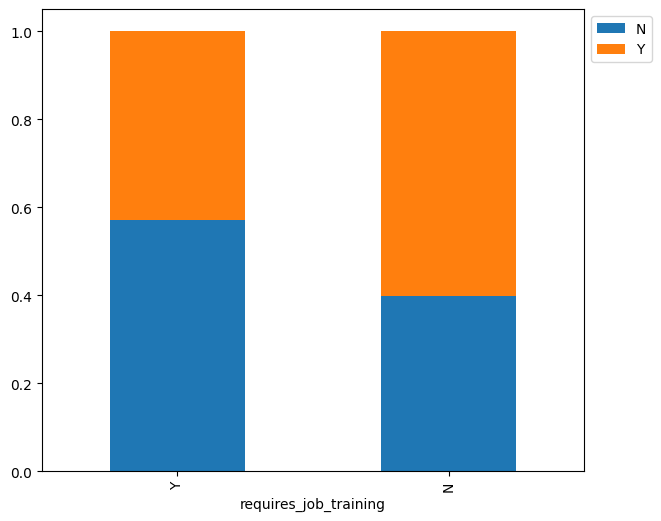

In [ ]:
stacked_barplot(df,'requires_job_training','has_job_experience')

*   Almost 60% of candidates who requires a job training does not have job experience.

####Observations on has_job_experience vs full_time_position

has_job_experience      N      Y    All
full_time_position                     
All                 10661  14786  25447
Y                    9365  13376  22741
N                    1296   1410   2706
------------------------------------------------------------------------------------------------------------------------


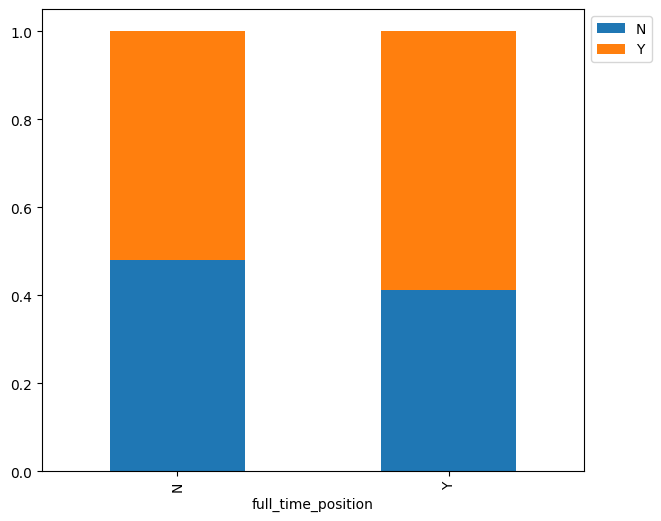

In [ ]:
stacked_barplot(df,'full_time_position','has_job_experience')

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df.full_time_position, df.has_job_experience)

stat,pval,dof,exp_freq = chi2_contingency(contingency_table)
print("Value of p is", pval)

Value of p is 2.5640287488321876e-11


*   full_time_position and has_job_experience are dependent on each other.
*   About 60% candidates who have full time has job experience.

####Observations on full_time_position vs requires_job_training

requires_job_training      N     Y    All
full_time_position                       
All                    22498  2949  25447
Y                      19843  2898  22741
N                       2655    51   2706
------------------------------------------------------------------------------------------------------------------------


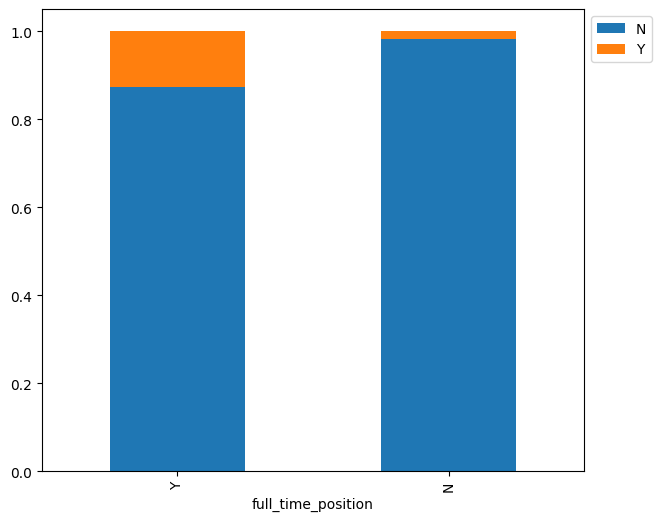

In [ ]:
stacked_barplot(df,'full_time_position','requires_job_training')

*   10% of candidates who have full time requires job training.
*   2% of candidates who does not have full time requires job training.

####Observations on full_time_position vs unit_of_wage

full_time_position     N      Y    All
unit_of_wage                          
All                 2706  22741  25447
Year                2672  20261  22933
Hour                  19   2134   2153
Week                  10    262    272
Month                  5     84     89
------------------------------------------------------------------------------------------------------------------------


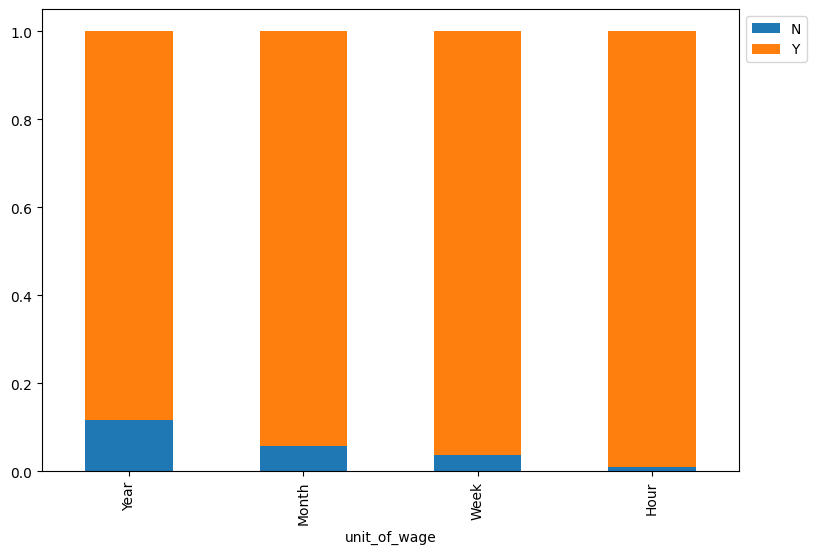

In [ ]:
stacked_barplot(df,'unit_of_wage','full_time_position')

*   98% of hourly wage workers have full time position.

####Observations on unit_of_wage vs prevailing_wage

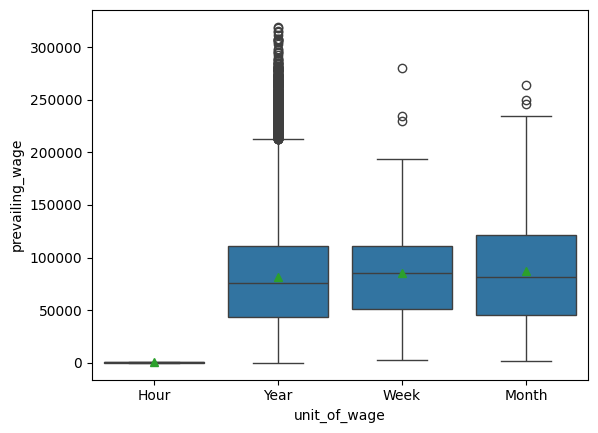

In [ ]:
sns.boxplot(data = df, x = 'unit_of_wage', y = 'prevailing_wage', showmeans = True);

*   The median of Weekly wage employees have more prevailing wage.
*   Hourly wage employees have low prevailing wage.

## Building bagging and boosting models

###Model evaluation criterion

The model can make wrong predictions:
1.   Not providing visa to eligible candidates.
2.   Providing visa to ineligible candidates.

In this case, both are important. Providing visas to the talented, hard-working and qualified candidates is important and not providing visa to the ineligible candidates is also important.

We'll use **F1-Score** as the evaluation of metrics because we want to **minimize the False Positives and False Negatives**.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Decision Tree - Model building and Hyperparameter tuning

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.659594  0.746716   0.744527  0.74562


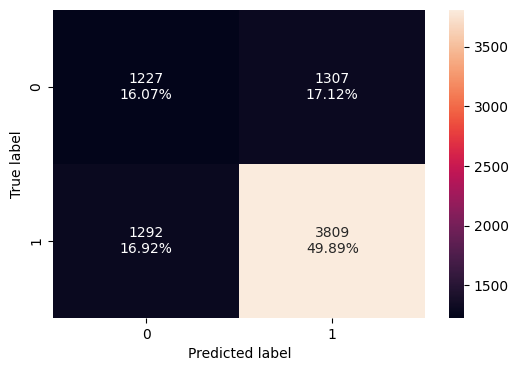

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.729845  0.929244   0.735826  0.821301
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.725606  0.922368   0.734697  0.817905


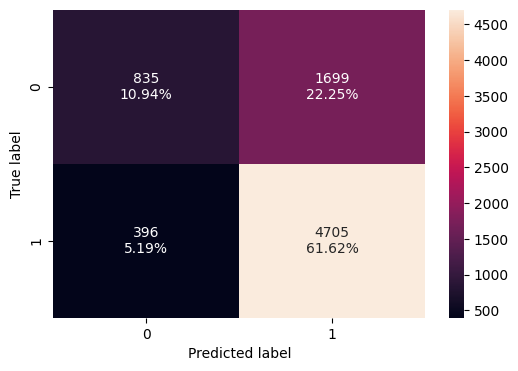

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

Overfitting of the model is reduced. Decent model. Let's see if there are any other model which is performing better than this.

###Bagging - Model building and Hyperparameter tuning

   Accuracy    Recall  Precision        F1
0   0.97395  0.975882   0.984987  0.980414
   Accuracy    Recall  Precision        F1
0  0.677407  0.752009   0.762018  0.756981


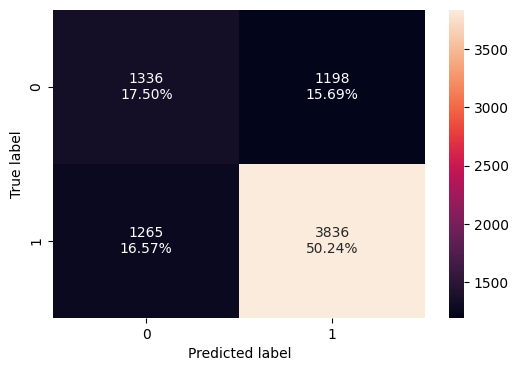

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

   Accuracy  Recall  Precision        F1
0  0.668089     1.0   0.668089  0.801023
   Accuracy  Recall  Precision        F1
0  0.668107     1.0   0.668107  0.801036


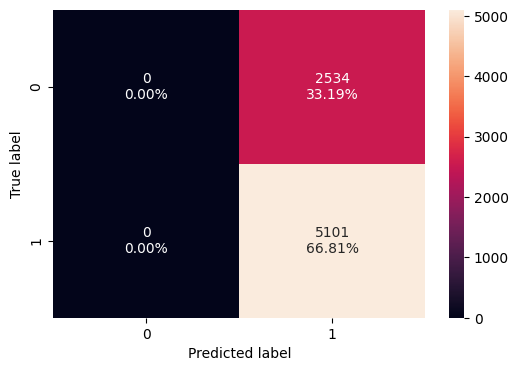

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

The overfitting of the model is reduced. The model have high recall score but the precision score is low. We cannot use this model for prediction.

###Random Forest - Model building and Hyperparameter tuning

Training performance:
    Accuracy    Recall  Precision       F1
0  0.999719  0.999748   0.999832  0.99979
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.66575  0.753578   0.748005  0.750781


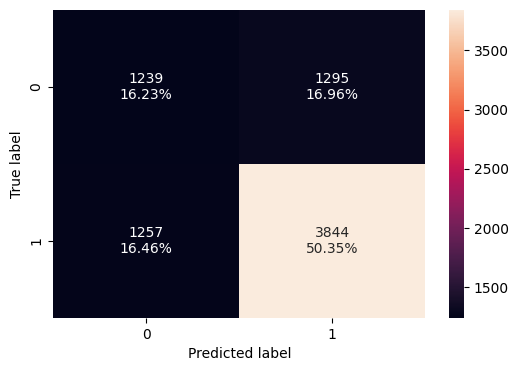

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.33,1:0.67},random_state=1)

parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, max_samples=0.4,
                       min_samples_leaf=3, n_estimators=110, random_state=1)

Training performance:
    Accuracy   Recall  Precision       F1
0  0.759432  0.96563   0.747771  0.84285
Testing performance:
    Accuracy   Recall  Precision        F1
0   0.72482  0.94158   0.727066  0.820535


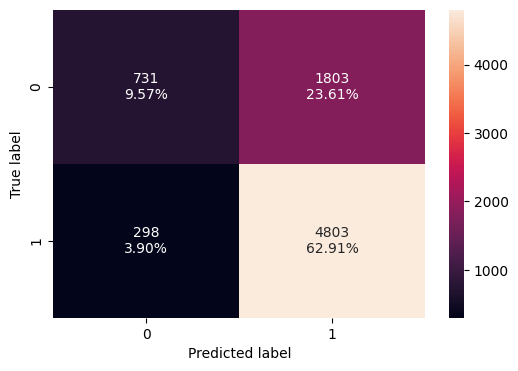

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

Overfitting of the model has reduced and we are getting decent f1-score.

###Boosting - Model building and Hyperparameter tuning

####Adaboost - Model building and Hyperparameter tuning

   Accuracy    Recall  Precision        F1
0  0.738659  0.888824   0.760443  0.819637
   Accuracy    Recall  Precision        F1
0  0.735167  0.878455   0.761686  0.815914


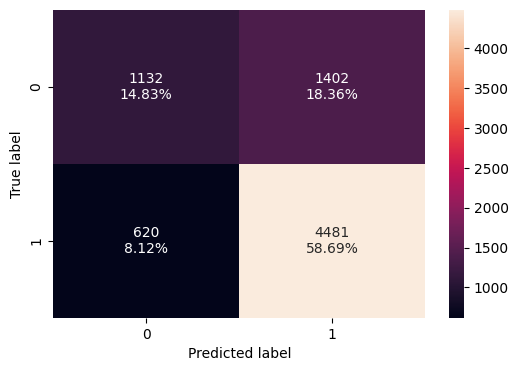

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
   "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=75, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.745958  0.899328   0.762848  0.825485
   Accuracy    Recall  Precision        F1
0  0.740144  0.889826   0.761449  0.820647


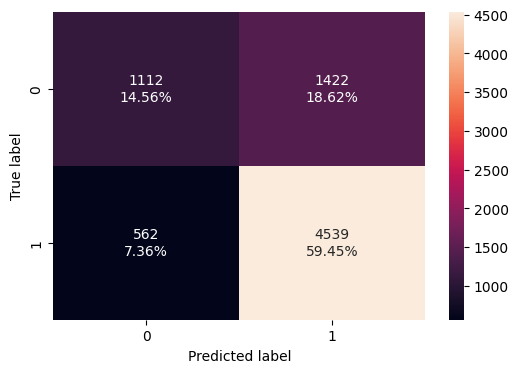

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Training and test model gives similar results meaning the model is not overfitting.

####Gradient Boosting - Model building and Hyperparameter tuning

Training performance:
    Accuracy    Recall  Precision       F1
0  0.755165  0.878319   0.782043  0.82739
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748657  0.868653   0.780106  0.822002


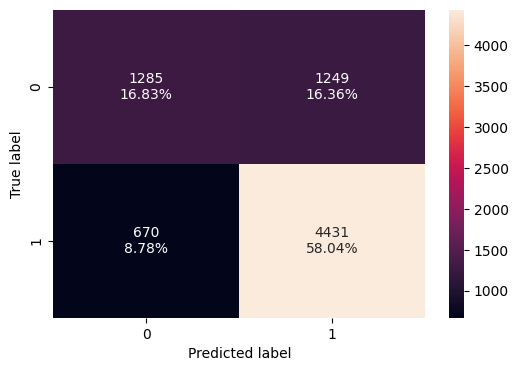

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.752751  0.87605   0.780665  0.825612
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748134  0.868261   0.779754  0.821631


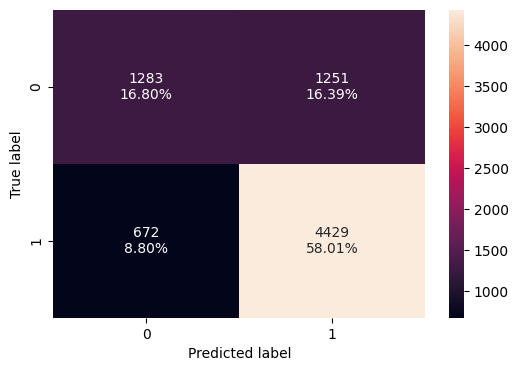

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

Pretty decent model. Not an overfitting model.

####XGBoost - Model building and Hyperparameter tuning

Training performance:
    Accuracy    Recall  Precision        F1
0  0.794521  0.900756   0.812169  0.854172
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.737525  0.852774    0.77637  0.81278


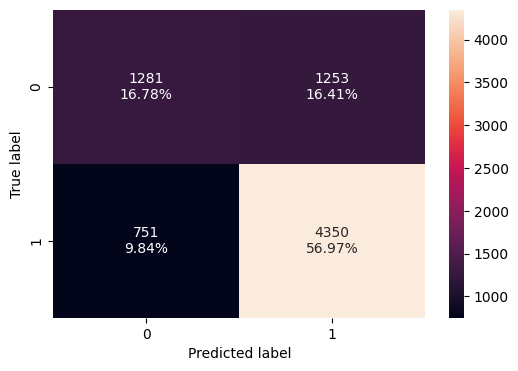

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    'n_estimators':np.arange(50,110,25),
    'scale_pos_weight':[1,2,5],
    'learning_rate':[0.01,0.1,0.05],
    'gamma':[1,3],
    'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757074  0.879916    0.78323  0.828763
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.752194  0.872574   0.781837  0.824717


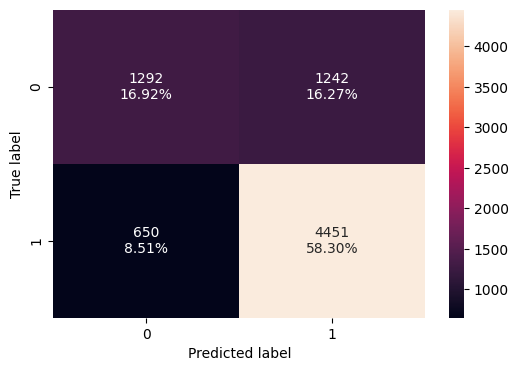

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

The model is not overfitting. We are getting good F1-score with this model.

###Stacking Model

In [ ]:
estimators = [('Gradient Boosting',gb_classifier), ('AdaBoosting',abc_tuned), ('Random Forest Tuned',rf_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('AdaBoosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.05,
                                                   n_estimators=75,
                                                   random_state=1)),
                               ('Random Forest Tuned',
                                RandomForestClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_samples=0.4,
                                                       min_samples_le...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=75, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759713  0.878235   0.786854  0.830037
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748003  0.864732   0.781399  0.820957


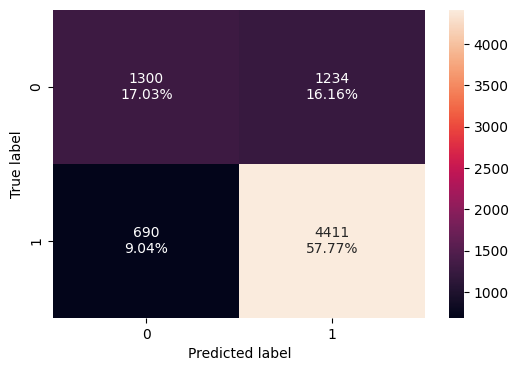

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

This model is performing decently and giving a good f1-score.

###Feature Importance

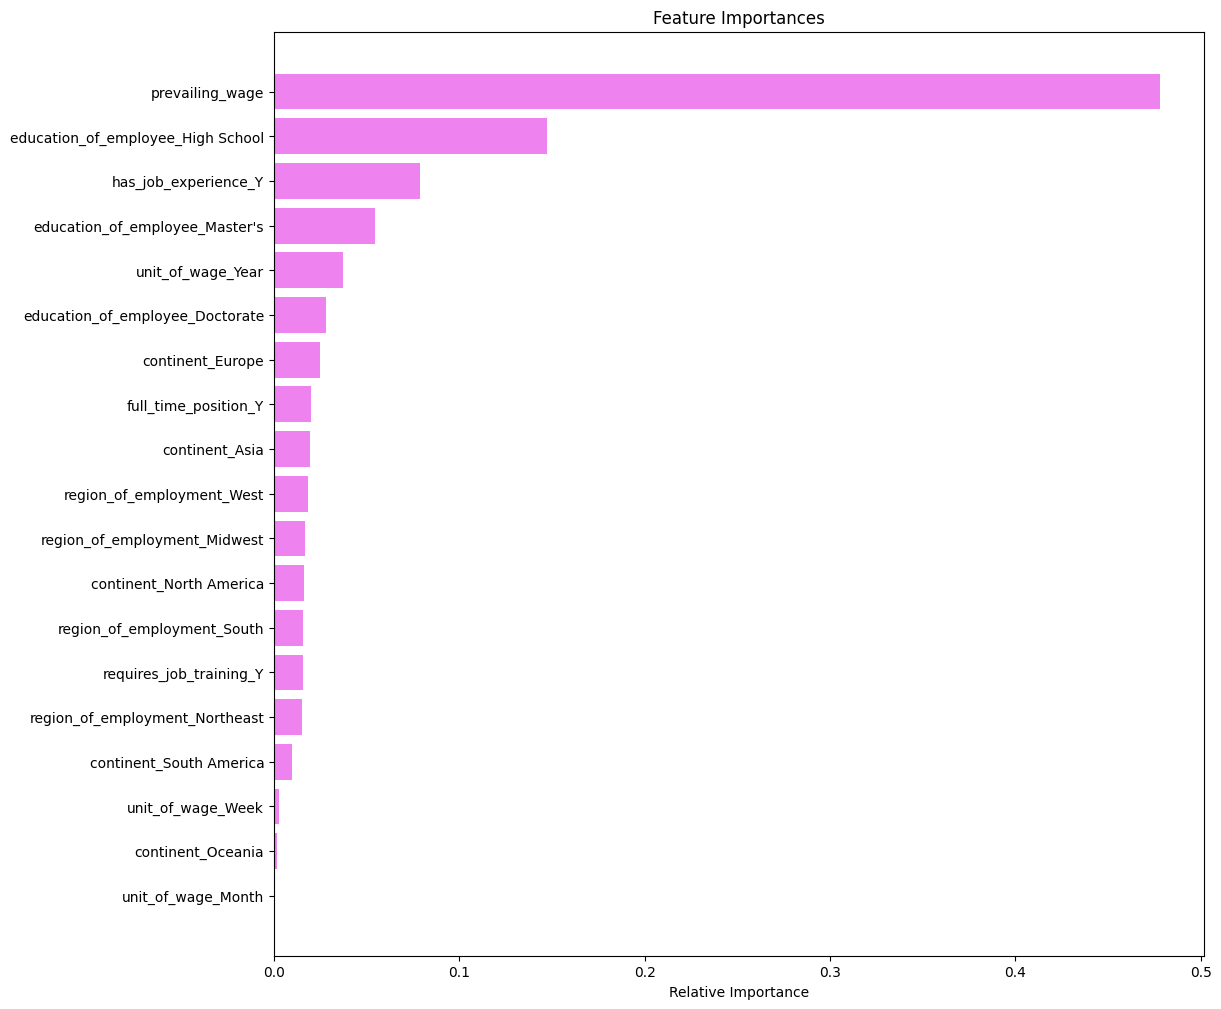

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

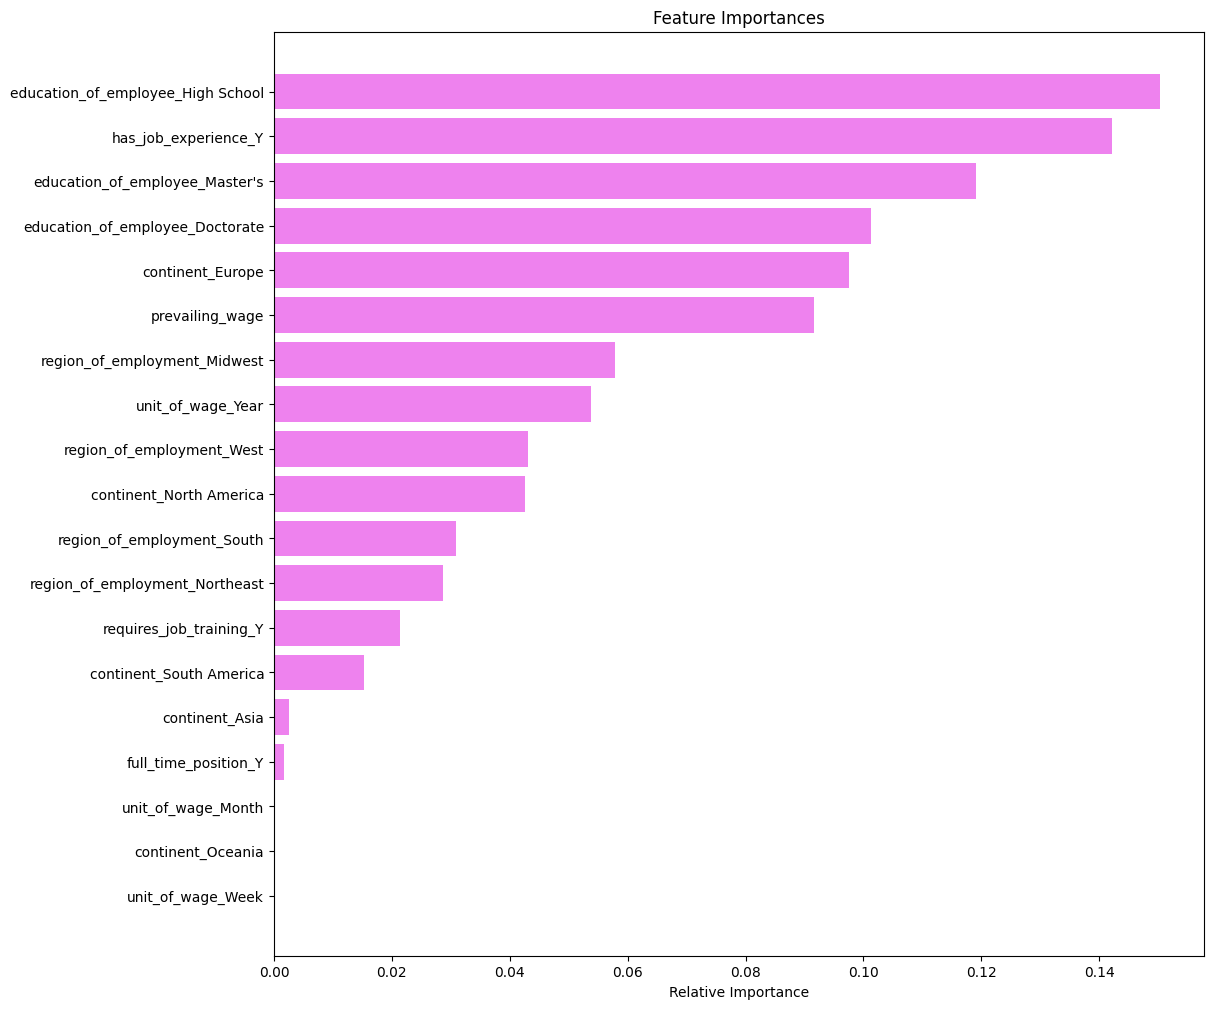

In [ ]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

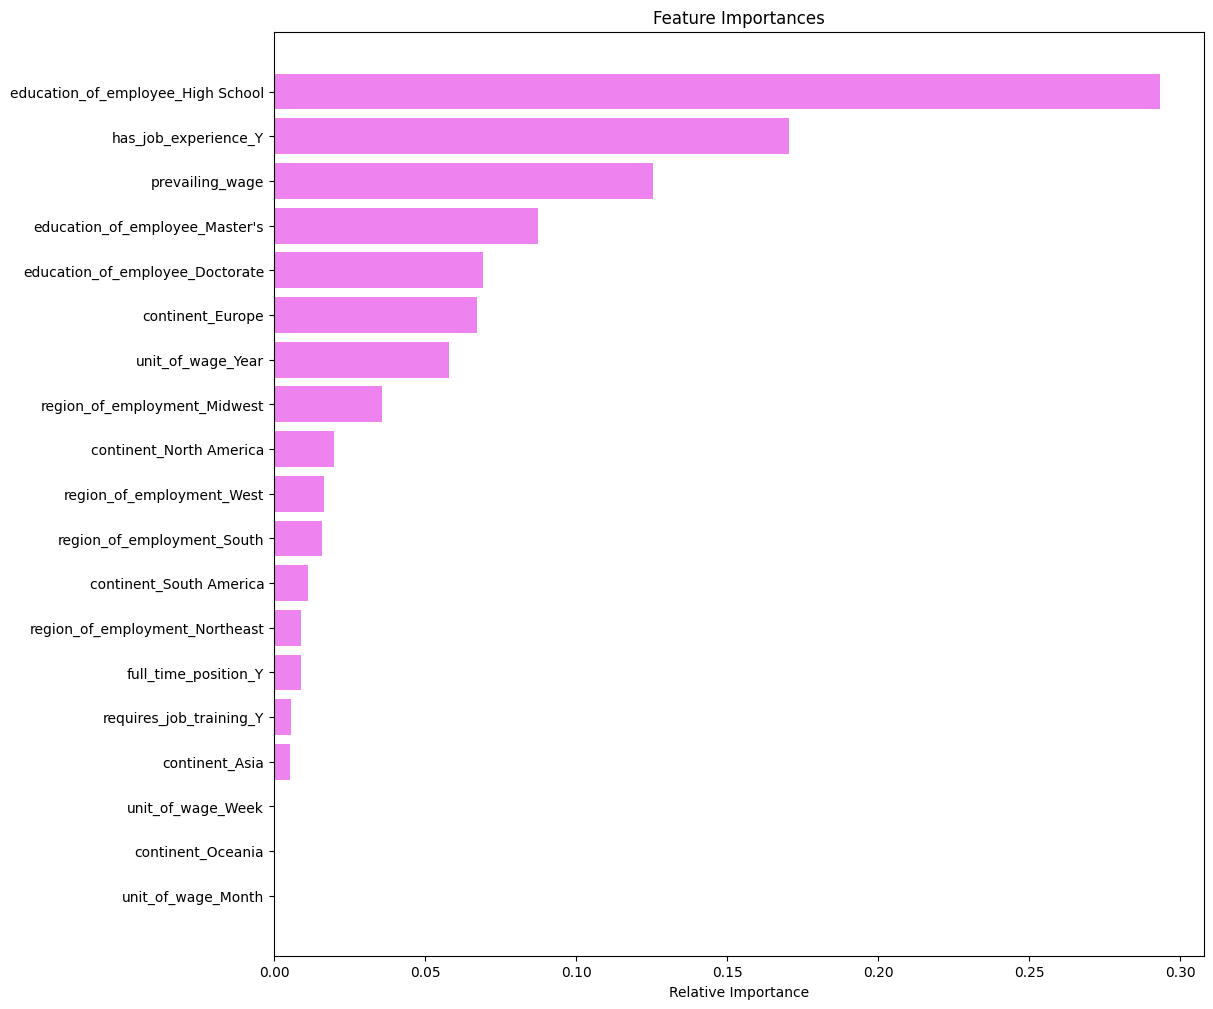

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

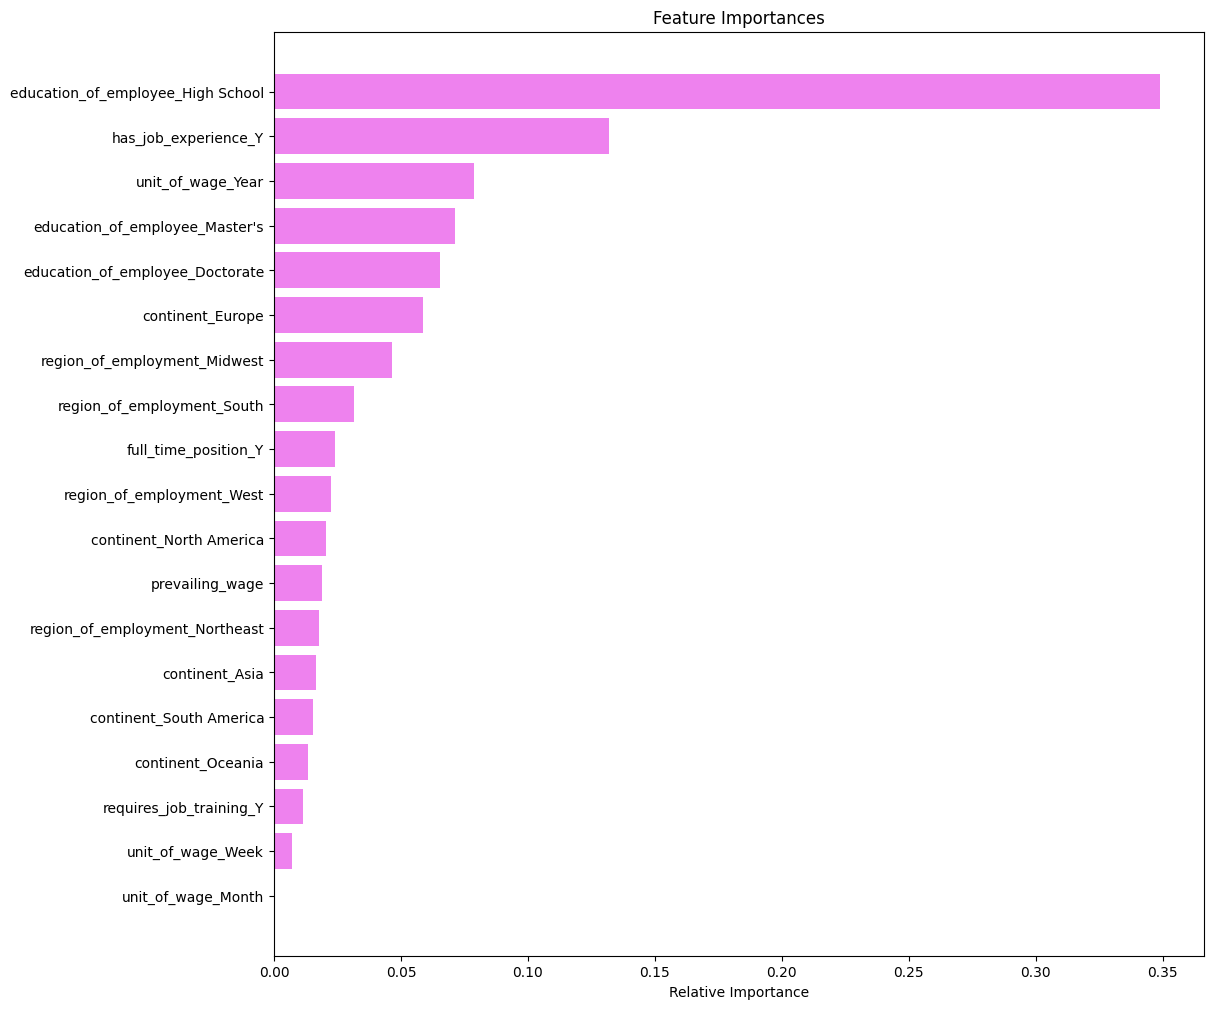

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The most importance features are education_of_employee_Highschool, has_job_experience_Y and prevailing_wage.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.729845,0.999719,0.759432,0.973950,0.668089,0.738659,0.745958,0.755165,0.752751,0.794521,0.757074,0.759713
Recall,1.0,0.929244,0.999748,0.965630,0.975882,1.000000,0.888824,0.899328,0.878319,0.876050,0.900756,0.879916,0.878235
Precision,1.0,0.735826,0.999832,0.747771,0.984987,0.668089,0.760443,0.762848,0.782043,0.780665,0.812169,0.783230,0.786854
F1,1.0,0.821301,0.999790,0.842850,0.980414,0.801023,0.819637,0.825485,0.827390,0.825612,0.854172,0.828763,0.830037


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.659594,0.725606,0.665750,0.724820,0.677407,0.668107,0.735167,0.740144,0.748657,0.748134,0.737525,0.752194,0.748003
Recall,0.746716,0.922368,0.753578,0.941580,0.752009,1.000000,0.878455,0.889826,0.868653,0.868261,0.852774,0.872574,0.864732
Precision,0.744527,0.734697,0.748005,0.727066,0.762018,0.668107,0.761686,0.761449,0.780106,0.779754,0.776370,0.781837,0.781399
F1,0.745620,0.817905,0.750781,0.820535,0.756981,0.801036,0.815914,0.820647,0.822002,0.821631,0.812780,0.824717,0.820957


## Actionable Insights and Recommendations

###Conclusion:

*   The important features are prevailing_wage, education_of_employee, has_job_experience and unit_of_wage.
*   Higher the prevailing_wage more chances of visas getting certified.
*   Lower the education_of_employee lesser the chances of visas getting certified.
*   When the education of employee is higher then the unit of wage is also higher.
*   If the candidate have job experience, then lesser chance of visa getting denied.
*   If the unit of wage for the employee is Yearly then lesser the chances of visa getting denied.  

###Recommendations

*   The company should shortlist candidates for visa certification on the basis of:
      *   Who have a higher educational degree like a Doctorate degree.
      *   Who have work experience.
      *   Who have higher wage than the prevailing wage.
      *   Who have Yearly wage.
*   After shortlisting candidates, we can look into more details and say whether or not to certify visa for the shortlisted candidates.

In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb to html
[NbConvertApp] Writing 3387273 bytes to /content/drive/My Drive/Colab Notebooks/DSBA_Project_ET_EasyVisa_Fullcode_V1.html
